<a href="https://colab.research.google.com/github/Adarsh-Vemali/AMEX_comp/blob/main/Class_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image

In [ ]:
from PIL import Image
import random
import requests
import cv2
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pylab as plt
import PIL
from multiprocessing import Pool
import os
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
import warnings
warnings.filterwarnings("ignore")
import sys

In [ ]:
!mkdir Run
!mkdir Test
!mkdir Run1
!mkdir Test1
!mkdir Run2
!mkdir Test2
!mkdir check1
!mkdir check2

mkdir: cannot create directory ‘Run’: File exists
mkdir: cannot create directory ‘Test’: File exists
mkdir: cannot create directory ‘Run1’: File exists
mkdir: cannot create directory ‘Test1’: File exists
mkdir: cannot create directory ‘Run2’: File exists
mkdir: cannot create directory ‘Test2’: File exists
mkdir: cannot create directory ‘check1’: File exists
mkdir: cannot create directory ‘check2’: File exists


In [ ]:
width, height = 250,500 # hyperparameter
dim = (width,height)
start_point = (0, 0)
thickness = -1
color = (255, 255, 255)
navbar_ht = 25

In [ ]:
add1 = "/content/drive/MyDrive/Images given(1)/Run/"
add2 = "/content/drive/MyDrive/Images given(1)/Test/"
#add1 = "/content/drive/MyDrive/batch0/Run/"
#add2 = "/content/drive/MyDrive/batch0/Test/"
add1 = "/content/drive/MyDrive/Images given(1)/Run(1)/"
add2 = "/content/drive/MyDrive/Images given(1)/Test(1)/"
add1 = "/content/drive/MyDrive/Images given/Run/"
add2 = "/content/drive/MyDrive/Images given/Test/"
add1 = "/content/drive/MyDrive/Full_data/Run/"
add2 = "/content/drive/MyDrive/Full_data/Test/"

In [ ]:
path1 = add1
path11 = add2

listing = os.listdir(path1)
listing = sorted(listing)
listing1 = os.listdir(path11)
listing1 = sorted(listing1)

p = Pool(1) # process 1 images simultaneously

def create_path(path,path1):
  id = 0
  id1 = 0
  id2 = 0
  for i in range(len(path)):
    pathreq = path[i]    
    pathreq1 = path1[i]    

    im = cv2.imread(add1+pathreq)
    im1 = cv2.imread(add2+pathreq1)

    dimensions = im.shape
    dimensions1 = im1.shape
    
    if dimensions!=dimensions1:
      cv2.imwrite('/content/Run2/'+str(id2)+".jpeg", im)
      cv2.imwrite('/content/Test2/'+str(id2)+".jpeg", im1)
      id2 +=1
    
    im = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    end_point = (im.shape[0], navbar_ht)# navbar_ht will be provided from the backend
    im = cv2.rectangle(im, start_point, end_point, color, thickness)

    im1= cv2.resize(im1, dim, interpolation=cv2.INTER_LINEAR)  
    end_point1 = (im1.shape[0], navbar_ht)# navbar_ht will be provided from the backend
    im1 = cv2.rectangle(im1, start_point, end_point1, color, thickness)
    
    if dimensions1 == dimensions:
      cv2.imwrite('/content/Run/'+str(id)+".jpeg", im)
      cv2.imwrite('/content/Test/'+str(id)+".jpeg", im1)
      id +=1
      
    else:
      #im = cv2.GaussianBlur(im,(5,5),0)
      #im1 = cv2.GaussianBlur(im1,(5,5),0)
      cv2.imwrite('/content/Run1/'+str(id1)+".jpeg", im)
      cv2.imwrite('/content/Test1/'+str(id1)+".jpeg", im1)
      id1 +=1

create_path(listing,listing1)

In [ ]:
df_SSIM = pd.DataFrame(columns=["Image_Number","SSIM_Score"])
ab = cv2.imread('/content/drive/MyDrive/Black.png')
kl = cv2.resize(ab,(10,height), interpolation=cv2.INTER_LINEAR)

## Score output Class 


In [ ]:
class Score_out:
  def __init__(self,pf1,pf2):

    self.good_score_thresh1 = 0.70
    self.very_good_thresh = 0.90
    self.ab_no = 0
    self.width, self.height = 250,500 # hyperparameter
    self.dim = (width,height)
    self.start_point = (0, 0)
    self.thickness = -1
    self.color = (255, 255, 255)
    self.navbar_ht = 25 # navbar_ht will be provided from the backend
    
    x,y,z,w = self.flag_check(pf1,pf2)
    self.flag = x
    self.p1 = y
    self.p2 = z
    self.diff_res = w
    

    if self.flag == 0:
      self.good_score_thresh = 0.80
      self.bad_score_thresh = 0.20
      self.DIFFERENT = 0.1
      self.SAME = 1
      self.half_n_half = 0.15
      self.lower_bound = 0.50
      self.upper_bound = 0.85
      self.area_thresh = 150
      self.area_thresh_cursor = 240
      self.min_h = 7
      self.very_good = 0.90

    elif self.flag ==1:
      self.good_score_thresh = 0.50
      self.bad_score_thresh = 0.10
      self.DIFFERENT = 0.15
      self.SAME = 1
      self.half_n_half = 0.15
      self.lower_bound = 0.50
      self.upper_bound = 0.85
      self.area_thresh = 150
      self.area_thresh_cursor = 245
      self.min_h = 7
      self.very_good = 0.85

  def plotter(self,s_d_list,string):  
    a = []
    for i in string:
      if i=="S":
        a.append("S")
      elif i == "D":
        a.append("D")

    print(len(s_d_list),len(a))

    b = s_d_list
    plt.scatter(b,a)
  
  def blockPrint(self):
    sys.stdout = open(os.devnull, 'w')

  def enablePrint(self):
    sys.stdout = sys.__stdout__

  def flag_check(self,pf1,pf2):
    
    before = cv2.imread(pf1)
    after = cv2.imread(pf2)
    
    diff_res = 0

    if (before.shape != after.shape):
      diff_res =1

    dim = (self.width,self.height)
    
    end_point = (before.shape[0], self.navbar_ht)
    before = cv2.rectangle(before, self.start_point, end_point, self.color, self.thickness)
    before = cv2.resize(before, dim, interpolation=cv2.INTER_LINEAR)
    
    after = cv2.resize(after, dim, interpolation=cv2.INTER_LINEAR)
    end_point = (after.shape[0], self.navbar_ht)
    after = cv2.rectangle(after, self.start_point, end_point, self.color, self.thickness)

    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    try:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=False, full=True)  
    except Exception:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=True, full=True)  

    if score<self.good_score_thresh1:
      flag = 1
    else:
      flag = 0

    return flag,before.copy(),after.copy(),diff_res

  def amalgamate(self,score1,score2,score):
  
    score11 = min(score1,score2)
    score21 = max(score1,score2)

    score1 = score11
    score2 = score21
    sure_flag = 0
    if score==score1 and score==score2:
      score_final = score
    elif score2-score1 > self.half_n_half:
      score_final = self.DIFFERENT
      sure_flag = 1
    elif score1>score:
      score_final = self.SAME
    elif score2 >= score and score1 <= score:
      score_final = self.SAME
    else:
        score_final = self.SAME

    return score_final,sure_flag
  
  def res_score5(self,p1,p2):
    
    before = p1.copy() # Cropped image 1
    after = p2.copy() # Cropped image 2
    sure_flag = 0

    dim = before.shape
    dim = (max(dim[1],7),max(dim[0],7))
    #if dim[0]*dim[1]<150:
     # return "ignore"

    before = cv2.resize(before,dim, interpolation=cv2.INTER_LINEAR) 
    after = cv2.resize(after,dim, interpolation=cv2.INTER_LINEAR) 

    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    try:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=False, full=True)  
    except Exception:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=True, full=True)  
    
    

    if score < self.lower_bound: # Threshold increase for speed, decrease for accuracy
      print("res_score5 lower_than_lower_bound: ", score)
      cv2_imshow(before)
      #cv2.imwrite("/content/check1/"+str(self.ab_no)+".jpeg",before)
      print()
      cv2_imshow(after)
      #cv2.imwrite("/content/check2/"+str(self.ab_no)+".jpeg",after)
      #self.ab_no+=1
      #print()
      print()
      print()
      sure_flag = -1
      return score/2,sure_flag#0 is the sure_flag

    x,y = (0,0)
    h,w = before.shape[0:2]  

    crop_image_p1 = before[y:y+h, x:x+int(w/2)]
    crop_image_p2 = after[y:y+h, x:x+int(w/2)]          

    crop_image_p11 = before[y:y+h,x+int(w/2):x+w]
    crop_image_p21 = after[y:y+h, x+int(w/2):x+w]    

    dim1 = crop_image_p1.shape          
    dim1 = (max(dim1[1],7),max(dim1[0],7))           

    dim2 = crop_image_p11.shape          
    dim2 = (max(dim2[1],0),max(dim2[0],7))           

    crop_image_p1 = cv2.resize(crop_image_p1,dim1, interpolation=cv2.INTER_LINEAR) 
    crop_image_p2 = cv2.resize(crop_image_p2,dim1, interpolation=cv2.INTER_LINEAR)                                       

    crop_image_p11 = cv2.resize(crop_image_p11,dim2, interpolation=cv2.INTER_LINEAR)
    crop_image_p21 = cv2.resize(crop_image_p21,dim2, interpolation=cv2.INTER_LINEAR)          

    crop_image_p1 = cv2.cvtColor(crop_image_p1, cv2.COLOR_BGR2GRAY)
    crop_image_p2 = cv2.cvtColor(crop_image_p2, cv2.COLOR_BGR2GRAY)  

    crop_image_p11 = cv2.cvtColor(crop_image_p11, cv2.COLOR_BGR2GRAY)
    crop_image_p21 = cv2.cvtColor(crop_image_p21, cv2.COLOR_BGR2GRAY)

    score_final = score

    if h>=self.min_h:#change 0 as hyperparameter                      
      if score > self.lower_bound and score < self.upper_bound:
        try:
          (score1, diff1) = compare_ssim(crop_image_p1, crop_image_p2 ,multichannel=False, full=True)  
        except Exception:
          (score1, diff1) = compare_ssim(crop_image_p1, crop_image_p2 ,multichannel=True, full=True)  

        try:
          (score2, diff2) = compare_ssim(crop_image_p11, crop_image_p21 ,multichannel=False, full=True)  
        except Exception:
          (score2, diff2) = compare_ssim(crop_image_p11, crop_image_p21 ,multichannel=True, full=True) 
        print("First half SSIM : ",score1)
        cv2_imshow(crop_image_p1)
        print()
        cv2_imshow(crop_image_p2)
        print("Second half SSIM : ",score2)
        cv2_imshow(crop_image_p11)
        print()
        cv2_imshow(crop_image_p21)
        print()
        print()
        score_final,sure_flag = self.amalgamate(score1,score2,score)

    cv2.waitKey(0)

    print("res_score5: ", score)
    cv2_imshow(before)
    #cv2.imwrite("/content/check1/"+str(self.ab_no)+".jpeg",before)
    print()
    cv2_imshow(after)
    #cv2.imwrite("/content/check2/"+str(self.ab_no)+".jpeg",after)
    #self.ab_no+=1
    #print()
    print()
    print()

    return score_final,sure_flag

  def resolution_score6(self,pf1,pf2):

    res_6_list = []
    diff_num = 0
    before = pf1.copy() # Cropped image 1
    after = pf2.copy() # Cropped image 2

    dim = before.shape
    breadth = before.shape[1]
    tall = before.shape[0]
    dim = (max(dim[1],7),max(dim[0],7))
    print("dim:",dim)

    comp_a = np.array([[before[tall//2][breadth-1]]*breadth]*tall)
    comp_b = np.array([[before[tall//2][breadth-1]]*breadth]*tall)

    #before = cv2.resize(before,dim, interpolation=cv2.INTER_LINEAR) 
    #after = cv2.resize(after, dim, interpolation=cv2.INTER_LINEAR)
    comp_a = cv2.resize(comp_a,dim, interpolation=cv2.INTER_LINEAR)
    comp_b = cv2.resize(comp_b,dim, interpolation=cv2.INTER_LINEAR)    

    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
    comp_a_gray = cv2.cvtColor(comp_a, cv2.COLOR_BGR2GRAY)
    comp_b_gray = cv2.cvtColor(comp_b, cv2.COLOR_BGR2GRAY)

    try:
      (score, diff) = compare_ssim(before_gray, comp_a_gray ,multichannel=False, full=True)  
    except Exception:
      (score, diff) = compare_ssim(before_gray, comp_a_gray ,multichannel=True, full=True)    
    try:
      (score, diff1) = compare_ssim(after_gray, comp_b_gray ,multichannel=False, full=True)  
    except Exception:
      (score, diff1) = compare_ssim(after_gray, comp_b_gray ,multichannel=True, full=True)
    try:
      (scorereq, diffreq) = compare_ssim(before_gray, after_gray ,multichannel=False, full=True)
    except Exception:
      (scorereq, diffreq) = compare_ssim(before_gray, after_gray ,multichannel=True, full=True)

    diff = (diff * 255).astype("uint8")
    diff = cv2.resize(diff,dim, interpolation=cv2.INTER_LINEAR)

    diff1 = (diff1 * 255).astype("uint8")
    diff1 = cv2.resize(diff1,dim, interpolation=cv2.INTER_LINEAR)

    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    contours = contours[0] if len(contours) == 2 else contours[1]
 
    thresh1 = cv2.threshold(diff1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours1 = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours1 = contours1[0] if len(contours1) == 2 else contours1[1]




################################################################################################

    l1 = list()
    l2 = list()
    idx = 0
    idx1 = 0
        
    for item in contours:
      x_,y_,w_val,h_val = cv2.boundingRect(item)
      l1.append((w_val*h_val,idx))
      idx += 1
    
    for item in contours1: 
      x,y,w_val,h_val = cv2.boundingRect(item)
      l2.append((w_val*h_val,idx1))
      idx1 += 1
    
    l1 = sorted(l1,reverse=True)
    l2 = sorted(l2,reverse=True)    

    f1 = list()
    f2 = list()
    f11 = list()
    f21 = list()
    i = 0
    j = 0
    while(True):      
      if j >= len(l2) or i >= len(l1):
        #print("breaking")
        break

      thresh = 0.2 * (l1[i][0]+l2[j][0])/2

      if abs(l1[i][0] - l2[j][0]) < thresh:
        f1.append(contours[l1[i][1]])
        f11.append(l1[i][0])#####

        f2.append(contours1[l2[j][1]])
        f21.append(l2[j][0])####

        i+=1
        j+=1
      elif l1[i][0] - l2[j][0] > thresh:
        i+=1
      elif l2[j][0] - l1[i][0] > thresh:
        j+=1


    contours = f1
    contours1 = f2
    ratio = (len(f1)+1)/(min(len(l1),len(l2))+1)


################################################################################################



    for c,c1 in zip(contours,contours1):

      area = cv2.contourArea(c)
      area1 = cv2.contourArea(c1)

      if area >= self.area_thresh and area1>self.area_thresh and abs(area-area1) <= 0.2*area: 
        diff_num += 1
        x,y,w,h = cv2.boundingRect(c)
        x1,y1,w1,h1 = cv2.boundingRect(c1)

        crop_image_p1 = before[y:y+h, x:x+w].copy()          
        crop_image_p2 = after[y1:y1+h1, x1:x1+w1].copy()              

        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(comp_a, (x, y), (x + w, y + h), (36,255,12), 2)# CHANGING HERE MATTERS APPARENTLY WTF                                                        
            
        cv2.rectangle(after, (x1, y1), (x1 + w1, y1 + h1), (36,255,12), 2)
        cv2.rectangle(comp_b, (x1, y1), (x1 + w1, y1 + h1), (36,255,12), 2)

        dim = crop_image_p1.shape
        dim = (max(dim[1],7),max(dim[0],7))

        crop_image_p1 = cv2.resize(crop_image_p1, dim, interpolation=cv2.INTER_LINEAR)
        crop_image_p2 = cv2.resize(crop_image_p2, dim, interpolation=cv2.INTER_LINEAR)

        crop_image_p1_gray = cv2.cvtColor(crop_image_p1, cv2.COLOR_BGR2GRAY)
        crop_image_p2_gray = cv2.cvtColor(crop_image_p2, cv2.COLOR_BGR2GRAY)

        try:
          (score, diff) = compare_ssim(crop_image_p1_gray, crop_image_p2 ,multichannel=False, full=True)
        except Exception:
          (score, diff) = compare_ssim(crop_image_p1, crop_image_p2 ,multichannel=True, full=True)                

        res_6_list.append(score) 
        print("Resolution crop score res6score:",score)
        cv2_imshow(crop_image_p1)
        print()
        cv2_imshow(crop_image_p2)
        print()
        print()
    
    print("res6_score just normal SSIM score: ", scorereq)
    cv2_imshow(before)
    print()
    cv2_imshow(after)
    print()    

    score = np.mean(res_6_list)
    if len(res_6_list)==0:
      score = 0
      ratio = 0
      print("Here really??")
    print("res_score_6_final_for the above_crop",score)
    print()
    return score,ratio,diff_num

  def res_score(self):

    res_list = []
    res_list1 = []
    flagger = 3
    diff_num_final = 0

    before = self.p1.copy()
    after = self.p2.copy()
    
    dim = (width,height)
    dim = before.shape
    dim = (max(dim[1],7),max(dim[0],7))

    #before = cv2.resize(before, dim, interpolation=cv2.INTER_LINEAR)
    #after = cv2.resize(after, dim, interpolation=cv2.INTER_LINEAR)

    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    try:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=False, full=True)  
    except Exception:
      (score, diff) = compare_ssim(before_gray, after_gray ,multichannel=True, full=True)  

    diff = (diff * 255).astype("uint8")
    diff = cv2.resize(diff,dim, interpolation=cv2.INTER_LINEAR)

    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

  #if score >= self.good_score_thresh: #### for further optimisation uncomment
    for c in contours:
        area = cv2.contourArea(c)
        #print("Area : ",area,self.area_thresh)
        if area >= self.area_thresh:
            x,y,w,h = cv2.boundingRect(c)
            crop_image_p1 = before[y:y+h, x:x+w]
            crop_image_p2 = after[y:y+h, x:x+w]
            
            if h>10:
              
              print("Next sub-Image")
              print()
              if score < self.bad_score_thresh:
                flagger = 0
                print("Small score val:",score)
                break
              elif ((score >= self.good_score_thresh and self.diff_res == 0) or (score>=self.very_good)):
                print()   
                flagger = 1           
                diff_num_final += 1
                print("First if")
                res_5_score,sure_flag = self.res_score5(crop_image_p1.copy(),crop_image_p2.copy())
                if res_5_score == "ignored as the cropped image is too small!!":
                  print(res_5_score)
                else:
                  res_list.append(res_5_score)
                  print("Final weighted score5 of below cropped images: ",res_5_score)                
              else:     
                print("Else part") 
                flagger = 2                 
                res_5_score,sure_flag = self.res_score5(crop_image_p1.copy(),crop_image_p2.copy())
                res_6_score,ratio,diff_num = self.resolution_score6(crop_image_p1.copy(),crop_image_p2.copy())
                
                if sure_flag == -1:
                  res_5_score = res_6_score
                elif sure_flag == 1:
                  ratio = 0

#########%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                print("RATIO",ratio)
                final_resolution_score = (1-ratio)*res_5_score + ratio*res_6_score
                res_list.append(final_resolution_score)
                diff_num_final += diff_num+1
                print("####### weighted score56 of below cropped images: ",final_resolution_score)
#########%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

              cv2_imshow(crop_image_p1)
              print()
              cv2_imshow(crop_image_p2)
              print()              
                  
              cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
              cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
    
    ab = cv2.imread('/content/drive/MyDrive/Black.png')
    kl = cv2.resize(ab,(10,dim[1]), interpolation=cv2.INTER_LINEAR)
    
    img_concate_Hori= np.concatenate((before,kl),axis=1)
    img_concate_Hori= np.concatenate((img_concate_Hori,after),axis=1)
    print("Normal SSIM Score for these images: ", score)
    cv2_imshow(img_concate_Hori)
    print()
    cv2.waitKey(0)
    
    return score,res_list,self.very_good,flagger,self.diff_res, diff_num_final

  def call(self,df_SSIM):
    print("###########################################################################")
    print("Next Image")

    s_d_list = []
    list_res_list = []
    nll = []
    ###############################################################
    score,res_list, v_good, num_reses, different_res, diff_num_final  = self.res_score()
    res_list.append(score)

    print("reslist fr above image:",res_list)
    print("score for entire image:",score)
    list_res_list.append(res_list)

    print("res_list average",(sum(res_list))/(len(res_list)))
    s_d_list.append((sum(res_list))/(len(res_list)))

    res_list= list(map(lambda m : m + 0.000000001, res_list))
    nll.append(sum(-np.log(res_list)))
      
    ######################################################################################################################################################

## CODE TO DETERMINE FROM THE res_list IF IT REALLY IS THE SAME/DIFFERENT IMAGE
    if diff_num_final < 3:
      print()
      print()
      print("WARNING! : Small number of places are different")
      print()
    print()
    print("RES_LIST : ",res_list)
    print("FINAL_SCORE & VERDICT")
    print()
    f_value = 0
    if num_reses == 0:
      print(res_list[0])
      print("Verdict1: ","DIFFERENT")
    elif num_reses == 1:
      if score >= v_good:
        f_value = np.mean(res_list)
        print("Score2: ",f_value)
      else:
        res_list.append(score)
        f_value = np.mean(res_list)
        print("Score3: ",f_value)##CHECK AGAIN

      if different_res:
        if score >= v_good:
          if f_value < 0.7: # Subject_to_change
            print("Verdict41: ","DIFFERENT")
          else:
            print("Verdict51: ","SAME")
        else:
          if f_value < 0.6: # Subject_to_change
            print("Verdict4: ","DIFFERENT")
          else:
            print("Verdict5: ","SAME")
      else:
        if score >= v_good:
          if f_value < 0.7: # Subject_to_change
            print("Verdict41: ","DIFFERENT")
          else:
            print("Verdict51: ","SAME")
        else:
          if f_value < 0.8: # Subject_to_change
            print("Verdict6: ","DIFFERENT")
          else:
            print("Verdict7: ","SAME")

    elif num_reses == 2:
      f_value = np.mean(res_list) 
      print("Score8: ",f_value)

      if different_res:
        if f_value < 0.6: # Subject_to_change check this
          print("Verdict9: ","DIFFERENT")
        else:
          print("Verdict10: ","SAME")
      else:
        if f_value < 0.7: # Subject_to_change
          print("Verdict11: ","DIFFERENT")
        else:
          print("Verdict12: ","SAME")

    else:
      f_value = np.mean(res_list) 
      print("Score13: ",f_value)
      print("Verdict14: ","SAME")
      
    ######################################################################################################################################################

    #df2 = {'Image_Number': i, 'SSIM_Score': score}
    #df_SSIM = df_SSIM.append(df2, ignore_index = True)

    print()
    print()    

    return s_d_list

## Run the class to get score

###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.18071846350931725


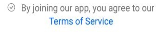

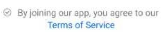



dim: (161, 32)
Resolution crop score res6score: 0.7612392744167854




Resolution crop score res6score: 0.6404209771913655




res6_score just normal SSIM score:  0.18071846350931725


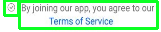

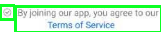


res_score_6_final_for the above_crop 0.7008301258040754

RATIO 1.0
####### weighted score56 of below cropped images:  0.7008301258040754


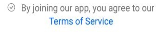

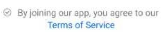


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.2390108467230744


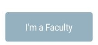

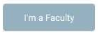



dim: (98, 45)
Resolution crop score res6score: 0.8240223480059035


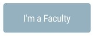

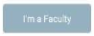



res6_score just normal SSIM score:  0.2390108467230744


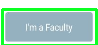

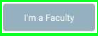


res_score_6_final_for the above_crop 0.8240223480059035

RATIO 1.0
####### weighted score56 of below cropped images:  0.8240223480059035


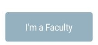

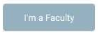


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.0289310881297442




dim: (64, 16)
res6_score just normal SSIM score:  0.0289310881297442



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
First half SSIM :  0.4971211843029471


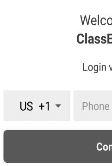

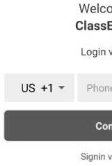

Second half SSIM :  0.5422046702788783


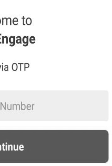

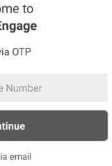



res_score5:  0.5097459584830357


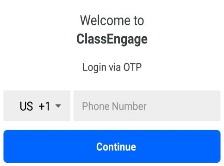

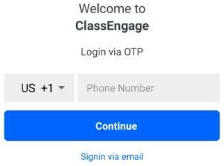



dim: (224, 166)
Resolution crop score res6score: 0.8014401904872392


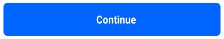

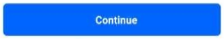



Resolution crop score res6score: 0.7979786203344529




Resolution crop score res6score: 0.8055933101103108




Resolution crop score res6score: 0.6118523387800828




Resolution crop score res6score: 0.3014396248824476




res6_score just normal SSIM score:  0.5097459584830357


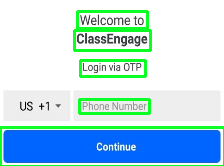

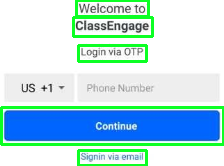


res_score_6_final_for the above_crop 0.6636608169189067

RATIO 0.75
####### weighted score56 of below cropped images:  0.7477456126891799


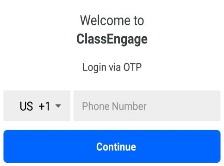

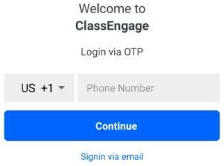


Next sub-Image

Else part
First half SSIM :  0.5711400889292408


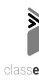

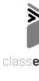

Second half SSIM :  0.5704604892497244


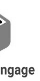

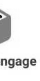



res_score5:  0.5388721457631246


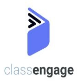

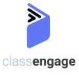



dim: (79, 81)
Resolution crop score res6score: 0.832759111346022




Resolution crop score res6score: 0.6460567188650862




res6_score just normal SSIM score:  0.5388721457631246


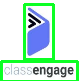

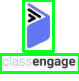


res_score_6_final_for the above_crop 0.7394079151055541

RATIO 1.0
####### weighted score56 of below cropped images:  0.7394079151055541


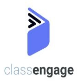

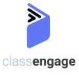


Normal SSIM Score for these images:  0.7613379962378015


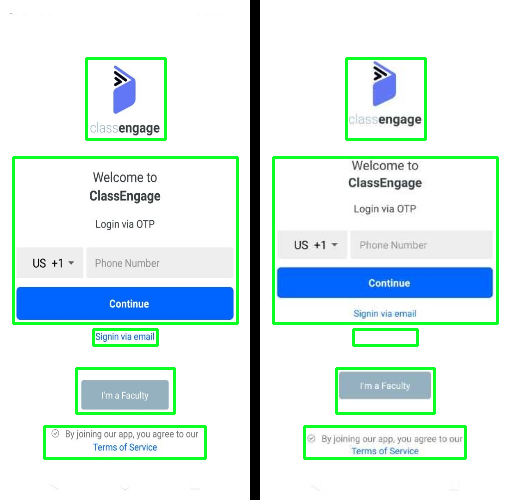


reslist fr above image: [0.7008301258040754, 0.8240223480059035, 0, 0.7477456126891799, 0.7394079151055541, 0.7613379962378015]
score for entire image: 0.7613379962378015
res_list average 0.6288906663070858

RES_LIST :  [0.7008301268040754, 0.8240223490059034, 1e-09, 0.7477456136891799, 0.7394079161055541, 0.7613379972378015]
FINAL_SCORE & VERDICT

Score8:  0.6288906673070856
Verdict10:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5:  0.9303017184878782




Final weighted score5 of below cropped images:  0.9303017184878782



Next sub-Image


First if
res_score5:  0.9088333442963895




Final weighted score5 of below cropped images:  0.9088333442963895



Next sub-Image


First if
res_score5:  0.9049268335700006




Final weighted score5 of below cropped images:  0.9049268335700006



Next sub-Image


First if
res_score5:  0.9487176347845065




Final weighted score5 of below cropped images:  0.9487176347845065



Next sub-Image


First if
First half SSIM :  0.7790226403754014


Second half SSIM :  0.8830723471885537




res_score5:  0.8401138891622085




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5:  0.9273989050170639




Final weighted score5 of below cropped images:  0.9273989050170639



Next sub-Image


First if
res_score5:  0.9316933768458032




Final weighted score5 of below cropped images:  0.9316933768458032



Next sub-Image


First if
res_score5:  0.8962331555821985




Final weighted score5 of below cropped images:  0.8962331555821985



Normal SSIM Score for these images:  0.9872347304750154


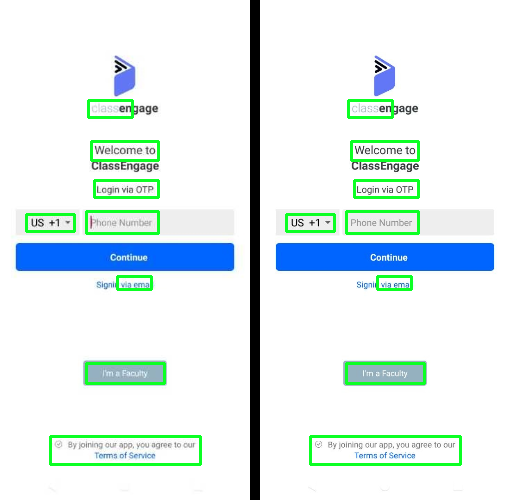


reslist fr above image: [0.9303017184878782, 0.9088333442963895, 0.9049268335700006, 0.9487176347845065, 1, 0.9273989050170639, 0.9316933768458032, 0.8962331555821985, 0.9872347304750154]
score for entire image: 0.9872347304750154
res_list average 0.9372599665620951

RES_LIST :  [0.9303017194878782, 0.9088333452963895, 0.9049268345700006, 0.9487176357845065, 1.000000001, 0.9273989060170639, 0.9316933778458032, 0.8962331565821985, 0.9872347314750154]
FINAL_SCORE & VERDICT

Score2:  0.937259967562095
Verdict51:  SAME


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.42901628443691725


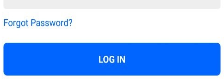

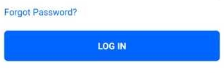



dim: (224, 79)
Resolution crop score res6score: 0.7656399533961139


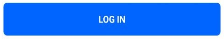

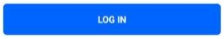



Resolution crop score res6score: 0.6316938289013888




res6_score just normal SSIM score:  0.42901628443691725


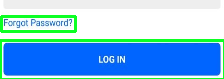

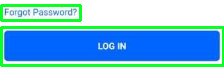


res_score_6_final_for the above_crop 0.6986668911487514

RATIO 1.0
####### weighted score56 of below cropped images:  0.6986668911487514


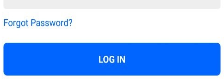

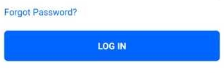


Next sub-Image

Else part
First half SSIM :  0.44336110789843963


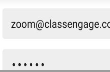

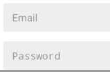

Second half SSIM :  0.7084145271710771


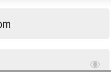

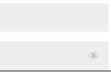



res_score5:  0.5767281139273025


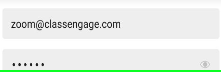

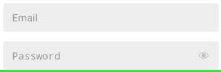



dim: (221, 72)
Resolution crop score res6score: 0.66205602852123


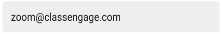

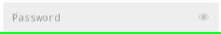



res6_score just normal SSIM score:  0.5767281139273025


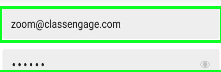

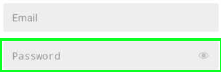


res_score_6_final_for the above_crop 0.66205602852123

RATIO 0
####### weighted score56 of below cropped images:  0.1


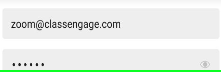

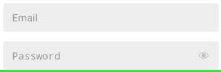


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.028604778414729876




dim: (41, 17)
Resolution crop score res6score: 0.8151280135788298




res6_score just normal SSIM score:  0.028604778414729876



res_score_6_final_for the above_crop 0.8151280135788298

RATIO 1.0
####### weighted score56 of below cropped images:  0.8151280135788298



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.042096020569689134




dim: (39, 19)
Resolution crop score res6score: 0.8085042090453115




res6_score just normal SSIM score:  0.042096020569689134



res_score_6_final_for the above_crop 0.8085042090453115

RATIO 1.0
####### weighted score56 of below cropped images:  0.8085042090453115



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.18898782367937292




dim: (15, 18)
res6_score just normal SSIM score:  0.18898782367937292



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Normal SSIM Score for these images:  0.8203702186085083


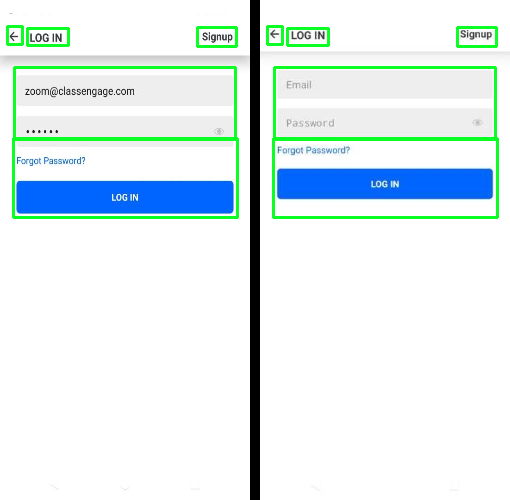


reslist fr above image: [0.6986668911487514, 0.1, 0.8151280135788298, 0.8085042090453115, 0, 0.8203702186085083]
score for entire image: 0.8203702186085083
res_list average 0.5404448887302334

RES_LIST :  [0.6986668921487513, 0.100000001, 0.8151280145788298, 0.8085042100453115, 1e-09, 0.8203702196085083]
FINAL_SCORE & VERDICT

Score8:  0.5404448897302335
Verdict9:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.5543702228225261


Second half SSIM :  0.817367867329213




res_score5:  0.6895644709521078




Final weighted score5 of below cropped images:  0.1



Normal SSIM Score for these images:  0.9649978778582843


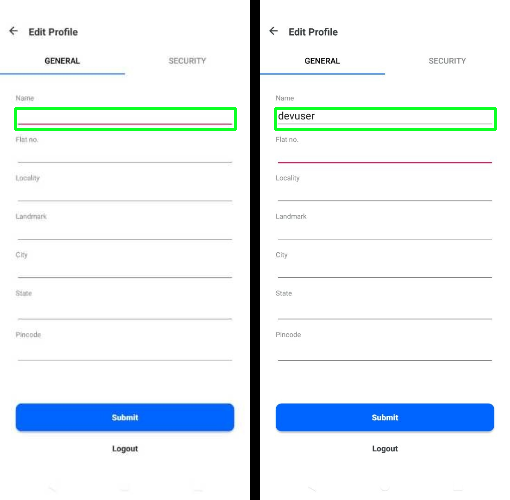


reslist fr above image: [0.1, 0.9649978778582843]
score for entire image: 0.9649978778582843
res_list average 0.5324989389291421


WARNING! : Small number of places are different


RES_LIST :  [0.100000001, 0.9649978788582843]
FINAL_SCORE & VERDICT

Score2:  0.5324989399291421
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.10532596262886296


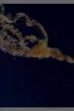

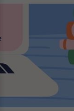



Final weighted score5 of below cropped images:  0.05266298131443148


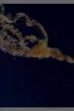

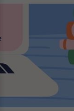


Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.4920594875918938




Final weighted score5 of below cropped images:  0.2460297437959469



Normal SSIM Score for these images:  0.9125723065534176


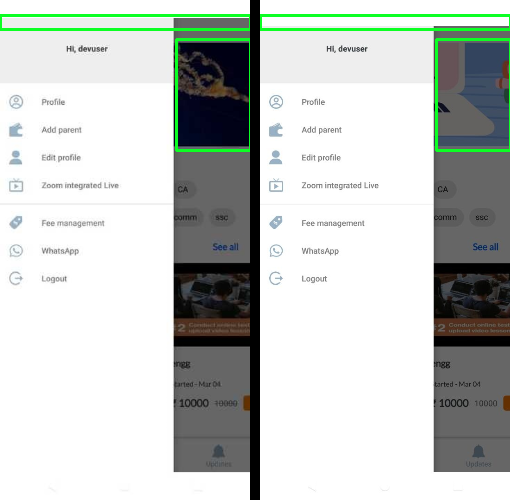


reslist fr above image: [0.05266298131443148, 0.2460297437959469, 0.9125723065534176]
score for entire image: 0.9125723065534176
res_list average 0.40375501055459867


WARNING! : Small number of places are different


RES_LIST :  [0.05266298231443148, 0.2460297447959469, 0.9125723075534176]
FINAL_SCORE & VERDICT

Score2:  0.40375501155459864
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.1924926703641937




dim: (32, 23)
Resolution crop score res6score: 0.47746084607308176




res6_score just normal SSIM score:  0.1924926703641937



res_score_6_final_for the above_crop 0.47746084607308176

RATIO 1.0
####### weighted score56 of below cropped images:  0.47746084607308176



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.34459507801691586


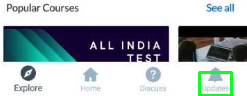

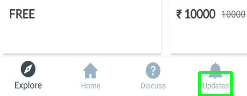



dim: (247, 96)
res6_score just normal SSIM score:  0.34459507801691586


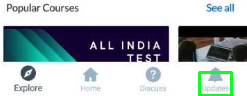

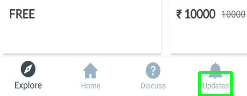


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


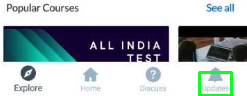

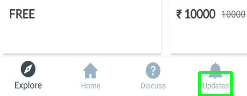


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.01906203173477718




dim: (59, 13)
res6_score just normal SSIM score:  0.01906203173477718



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.011237382584836286




dim: (27, 15)
res6_score just normal SSIM score:  0.011237382584836286



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.3568947572582871


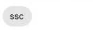

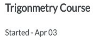



dim: (93, 40)
Resolution crop score res6score: 0.1747376482883299




res6_score just normal SSIM score:  0.3568947572582871


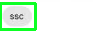

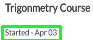


res_score_6_final_for the above_crop 0.1747376482883299

RATIO 1.0
####### weighted score56 of below cropped images:  0.1747376482883299


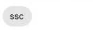

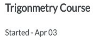


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.11513142376115469


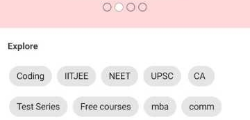

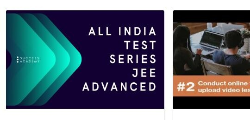



dim: (250, 120)
res6_score just normal SSIM score:  0.11513142376115469


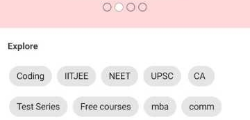

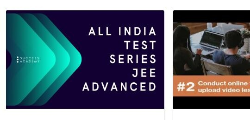


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


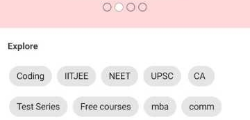

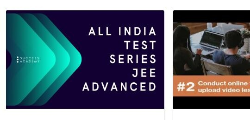


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.018508238223014464




dim: (33, 14)
res6_score just normal SSIM score:  0.018508238223014464



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.3000046959241211




dim: (33, 27)
res6_score just normal SSIM score:  0.3000046959241211



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.49155138530270037


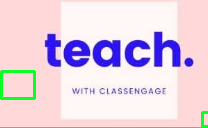

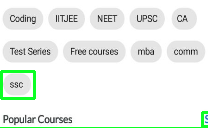



dim: (208, 128)
Resolution crop score res6score: 0.5683265565499658


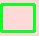

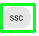



res6_score just normal SSIM score:  0.49155138530270037


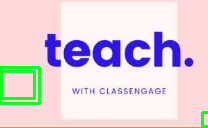

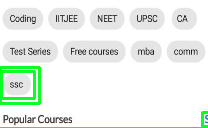


res_score_6_final_for the above_crop 0.5683265565499658

RATIO 0.75
####### weighted score56 of below cropped images:  0.5683265565499658


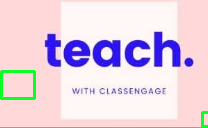

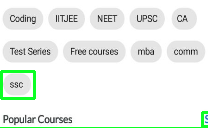


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.011226528392779194




dim: (35, 16)
res6_score just normal SSIM score:  0.011226528392779194



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  -0.05497382319500847




dim: (19, 17)
Resolution crop score res6score: 0.7665473656975333




res6_score just normal SSIM score:  -0.05497382319500847



res_score_6_final_for the above_crop 0.7665473656975333

RATIO 1.0
####### weighted score56 of below cropped images:  0.7665473656975333



Next sub-Image

Else part
First half SSIM :  0.2705497602008573


Second half SSIM :  0.8999942027704476




res_score5:  0.593011052500942




dim: (250, 26)
res6_score just normal SSIM score:  0.593011052500942



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0.15



Normal SSIM Score for these images:  0.5008938745556354


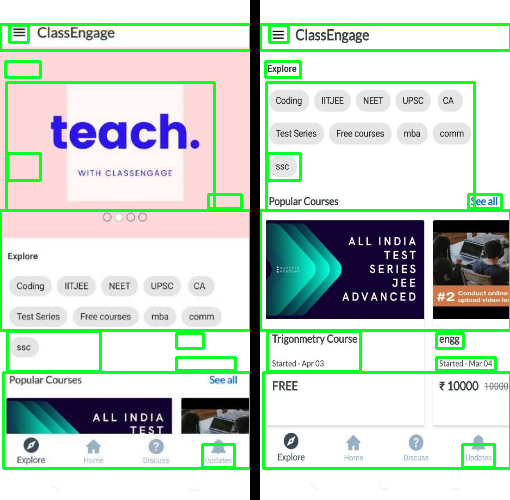


reslist fr above image: [0.47746084607308176, 0, 0, 0, 0.1747376482883299, 0, 0, 0, 0.5683265565499658, 0, 0.7665473656975333, 0.15, 0.5008938745556354]
score for entire image: 0.5008938745556354
res_list average 0.20292048393573434

RES_LIST :  [0.4774608470730818, 1e-09, 1e-09, 1e-09, 0.1747376492883299, 1e-09, 1e-09, 1e-09, 0.5683265575499657, 1e-09, 0.7665473666975333, 0.150000001, 0.5008938755556354]
FINAL_SCORE & VERDICT

Score8:  0.20292048493573434
Verdict9:  DIFFERENT


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9820780313904531


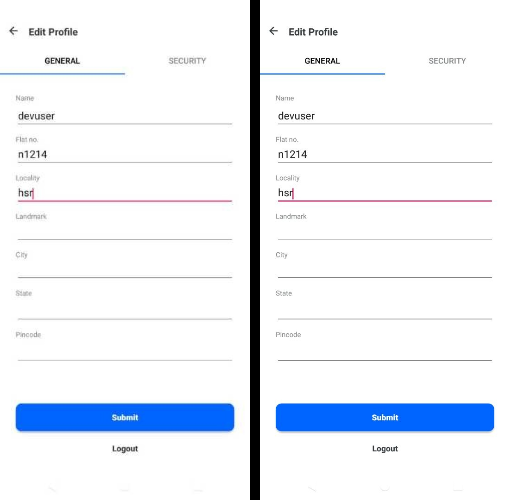


reslist fr above image: [0.9820780313904531]
score for entire image: 0.9820780313904531
res_list average 0.9820780313904531


WARNING! : Small number of places are different


RES_LIST :  [0.9820780323904531]
FINAL_SCORE & VERDICT

Score13:  0.9820780323904531
Verdict14:  SAME


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9731650642814268


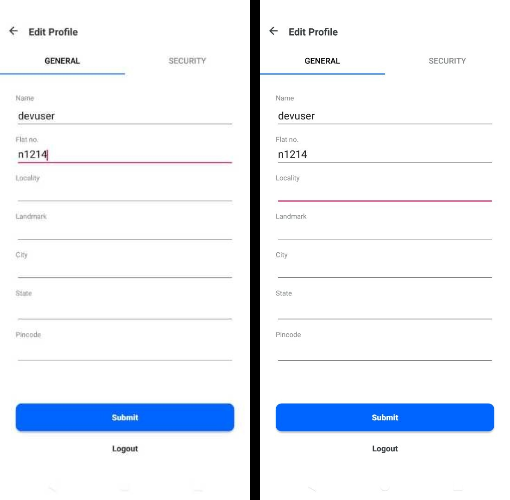


reslist fr above image: [0.9731650642814268]
score for entire image: 0.9731650642814268
res_list average 0.9731650642814268


WARNING! : Small number of places are different


RES_LIST :  [0.9731650652814268]
FINAL_SCORE & VERDICT

Score13:  0.9731650652814268
Verdict14:  SAME


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9793656607213367


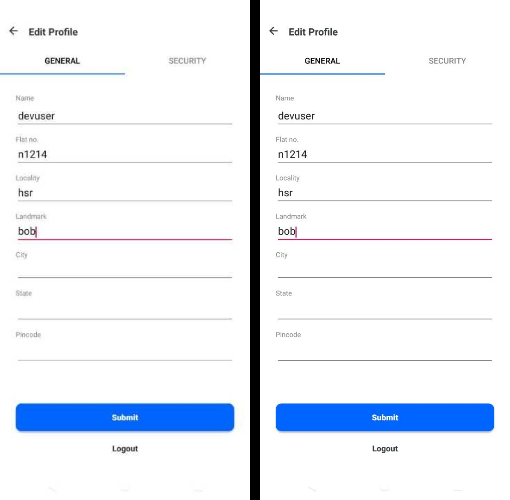


reslist fr above image: [0.9793656607213367]
score for entire image: 0.9793656607213367
res_list average 0.9793656607213367


WARNING! : Small number of places are different


RES_LIST :  [0.9793656617213367]
FINAL_SCORE & VERDICT

Score13:  0.9793656617213367
Verdict14:  SAME


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9785698691405885


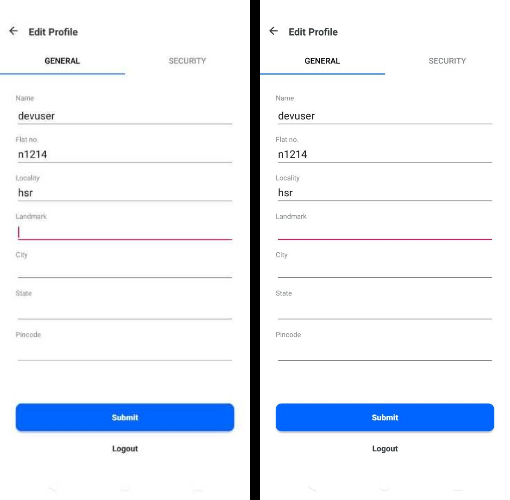


reslist fr above image: [0.9785698691405885]
score for entire image: 0.9785698691405885
res_list average 0.9785698691405885


WARNING! : Small number of places are different


RES_LIST :  [0.9785698701405885]
FINAL_SCORE & VERDICT

Score13:  0.9785698701405885
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.09690498767516871




Final weighted score5 of below cropped images:  0.048452493837584355



Next sub-Image


First if
First half SSIM :  0.7197868126607754


Second half SSIM :  0.44403586775797443




res_score5:  0.5756183935892678




Final weighted score5 of below cropped images:  0.1



Next sub-Image


First if
First half SSIM :  0.7273744625239819


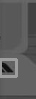

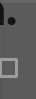

Second half SSIM :  0.8207065960933694


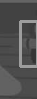

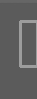



res_score5:  0.7797769177778435


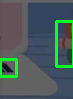

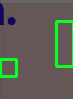



Final weighted score5 of below cropped images:  1


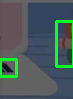

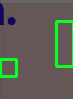


Next sub-Image


First if
First half SSIM :  0.621807406161927


Second half SSIM :  0.5348441743412172




res_score5:  0.538838779177009




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.4920594875918938




Final weighted score5 of below cropped images:  0.2460297437959469



Normal SSIM Score for these images:  0.9515847869788477


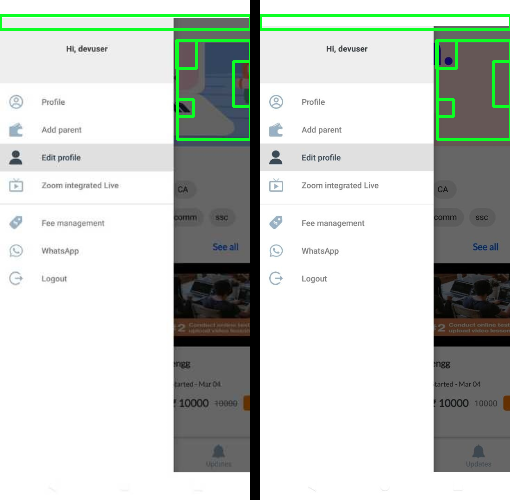


reslist fr above image: [0.048452493837584355, 0.1, 1, 1, 0.2460297437959469, 0.9515847869788477]
score for entire image: 0.9515847869788477
res_list average 0.5576778374353966

RES_LIST :  [0.048452494837584355, 0.100000001, 1.000000001, 1.000000001, 0.2460297447959469, 0.9515847879788477]
FINAL_SCORE & VERDICT

Score2:  0.5576778384353965
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.821992609872752


Second half SSIM :  0.7775695652421067




res_score5:  0.8097405639176964




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5:  0.8931113547276791




Final weighted score5 of below cropped images:  0.8931113547276791



Normal SSIM Score for these images:  0.9692517616308782


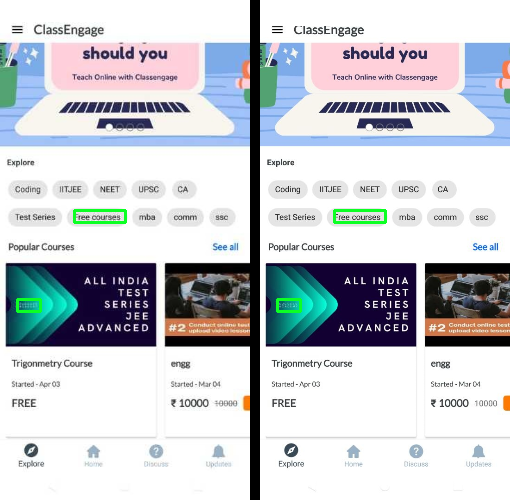


reslist fr above image: [1, 0.8931113547276791, 0.9692517616308782]
score for entire image: 0.9692517616308782
res_list average 0.9541210387861857


WARNING! : Small number of places are different


RES_LIST :  [1.000000001, 0.8931113557276791, 0.9692517626308782]
FINAL_SCORE & VERDICT

Score2:  0.9541210397861858
Verdict51:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5:  0.8945618030342289




Final weighted score5 of below cropped images:  0.8945618030342289



Next sub-Image


First if
res_score5:  0.9004349272229999




Final weighted score5 of below cropped images:  0.9004349272229999



Next sub-Image


First if
res_score5:  0.9007498147517126


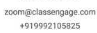

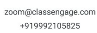



Final weighted score5 of below cropped images:  0.9007498147517126


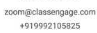

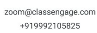


Normal SSIM Score for these images:  0.9857746744323422


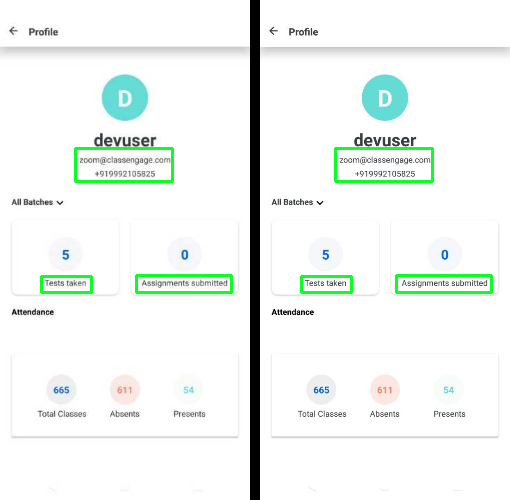


reslist fr above image: [0.8945618030342289, 0.9004349272229999, 0.9007498147517126, 0.9857746744323422]
score for entire image: 0.9857746744323422
res_list average 0.9203803048603209

RES_LIST :  [0.8945618040342289, 0.9004349282229999, 0.9007498157517125, 0.9857746754323422]
FINAL_SCORE & VERDICT

Score2:  0.9203803058603209
Verdict51:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5:  0.8945618030342289




Final weighted score5 of below cropped images:  0.8945618030342289



Next sub-Image


First if
res_score5:  0.9004349272229999




Final weighted score5 of below cropped images:  0.9004349272229999



Next sub-Image


First if
res_score5:  0.9007498147517126


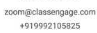

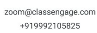



Final weighted score5 of below cropped images:  0.9007498147517126


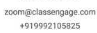

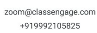


Normal SSIM Score for these images:  0.9857746744323422


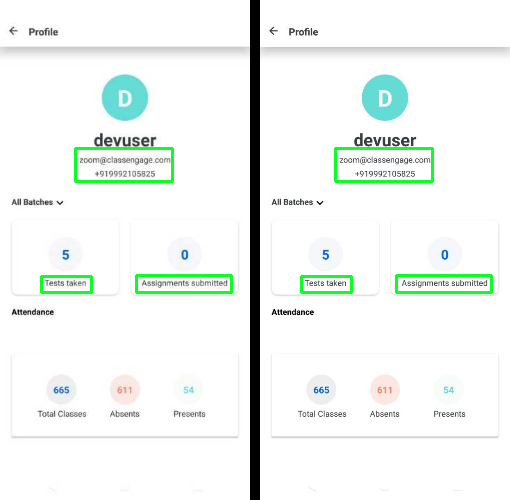


reslist fr above image: [0.8945618030342289, 0.9004349272229999, 0.9007498147517126, 0.9857746744323422]
score for entire image: 0.9857746744323422
res_list average 0.9203803048603209

RES_LIST :  [0.8945618040342289, 0.9004349282229999, 0.9007498157517125, 0.9857746754323422]
FINAL_SCORE & VERDICT

Score2:  0.9203803058603209
Verdict51:  SAME


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9898364805330123


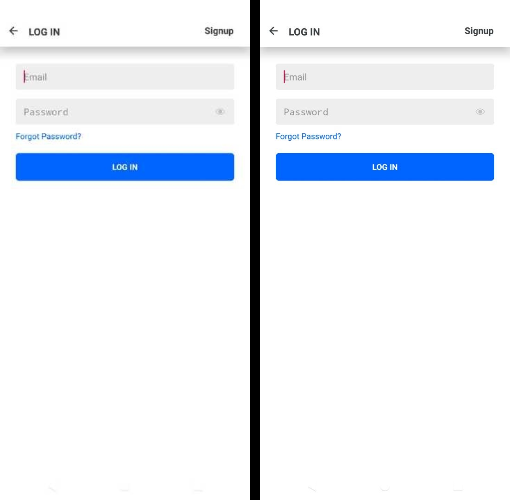


reslist fr above image: [0.9898364805330123]
score for entire image: 0.9898364805330123
res_list average 0.9898364805330123


WARNING! : Small number of places are different


RES_LIST :  [0.9898364815330123]
FINAL_SCORE & VERDICT

Score13:  0.9898364815330123
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.09168649110590621


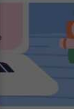

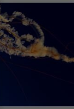



Final weighted score5 of below cropped images:  0.045843245552953105


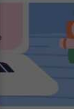

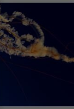


Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.4920594875918938




Final weighted score5 of below cropped images:  0.2460297437959469



Normal SSIM Score for these images:  0.9116626267724866


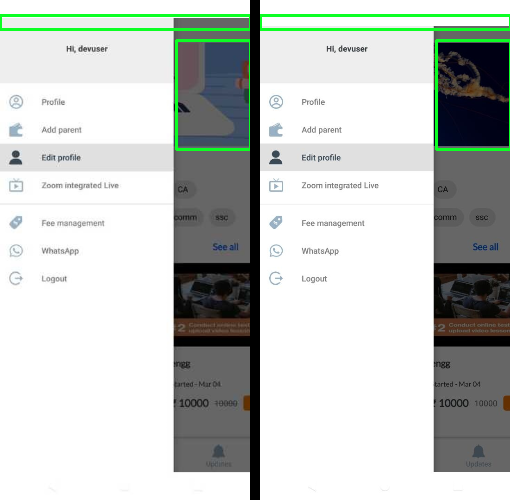


reslist fr above image: [0.045843245552953105, 0.2460297437959469, 0.9116626267724866]
score for entire image: 0.9116626267724866
res_list average 0.4011785387071289


WARNING! : Small number of places are different


RES_LIST :  [0.045843246552953104, 0.2460297447959469, 0.9116626277724865]
FINAL_SCORE & VERDICT

Score2:  0.40117853970712886
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.08984930259953654


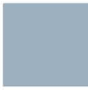

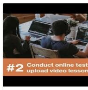



dim: (88, 90)
res6_score just normal SSIM score:  0.08984930259953654


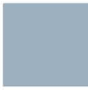

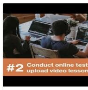


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


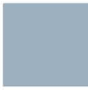

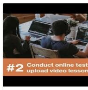


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.16437766345747787


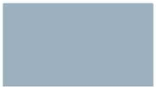

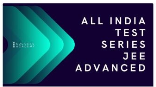



dim: (156, 87)
Resolution crop score res6score: 0.16971880897542402


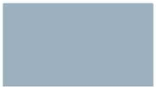

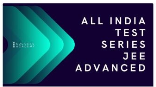



res6_score just normal SSIM score:  0.16437766345747787


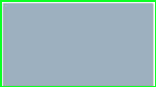

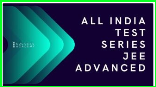


res_score_6_final_for the above_crop 0.16971880897542402

RATIO 1.0
####### weighted score56 of below cropped images:  0.16971880897542402


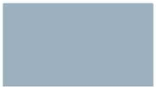

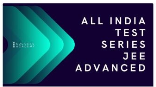


Next sub-Image

Else part
First half SSIM :  0.7030541968094809


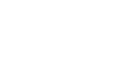

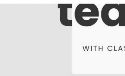

Second half SSIM :  0.7124875165840522


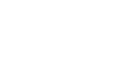

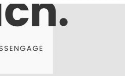



res_score5:  0.7018851656579274


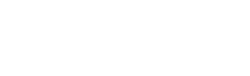

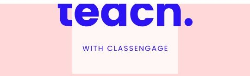



dim: (250, 76)
res6_score just normal SSIM score:  0.7018851656579274


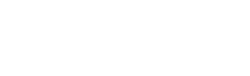

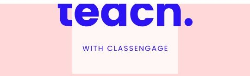


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  1


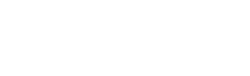

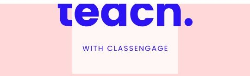


Normal SSIM Score for these images:  0.7805784171356163


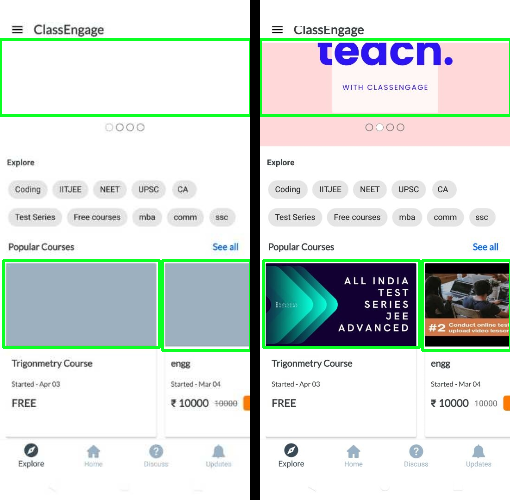


reslist fr above image: [0, 0.16971880897542402, 1, 0.7805784171356163]
score for entire image: 0.7805784171356163
res_list average 0.48757430652776007

RES_LIST :  [1e-09, 0.16971880997542402, 1.000000001, 0.7805784181356162]
FINAL_SCORE & VERDICT

Score8:  0.4875743075277601
Verdict9:  DIFFERENT


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9800486373833791


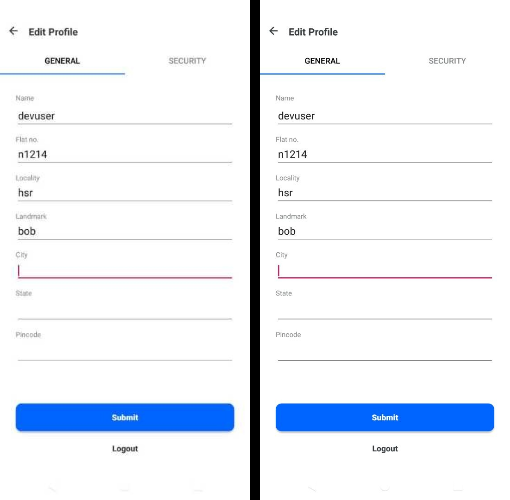


reslist fr above image: [0.9800486373833791]
score for entire image: 0.9800486373833791
res_list average 0.9800486373833791


WARNING! : Small number of places are different


RES_LIST :  [0.9800486383833791]
FINAL_SCORE & VERDICT

Score13:  0.9800486383833791
Verdict14:  SAME


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9798480773077336


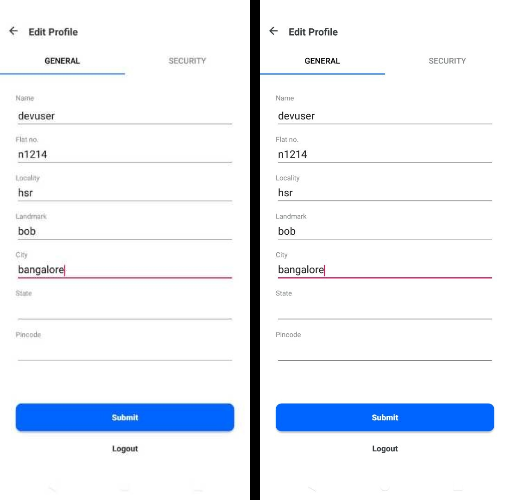


reslist fr above image: [0.9798480773077336]
score for entire image: 0.9798480773077336
res_list average 0.9798480773077336


WARNING! : Small number of places are different


RES_LIST :  [0.9798480783077336]
FINAL_SCORE & VERDICT

Score13:  0.9798480783077336
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.16696189707490194




Final weighted score5 of below cropped images:  0.08348094853745097



Normal SSIM Score for these images:  0.9780545185582714


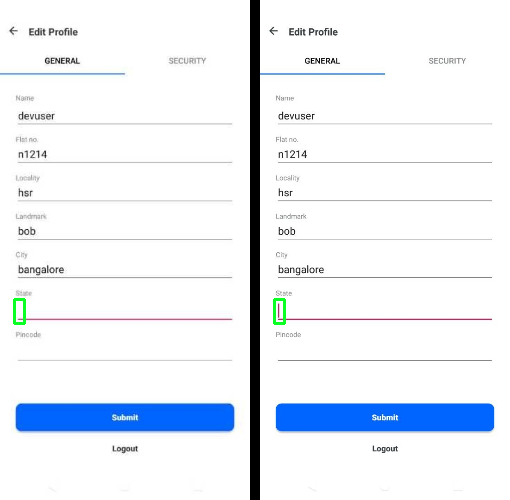


reslist fr above image: [0.08348094853745097, 0.9780545185582714]
score for entire image: 0.9780545185582714
res_list average 0.5307677335478612


WARNING! : Small number of places are different


RES_LIST :  [0.08348094953745097, 0.9780545195582714]
FINAL_SCORE & VERDICT

Score2:  0.5307677345478612
Verdict41:  DIFFERENT


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9781565322543491


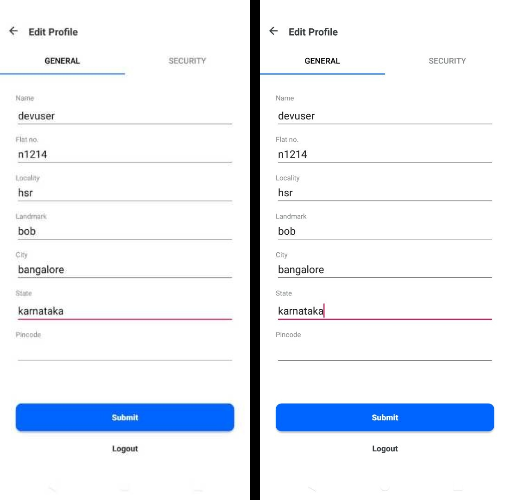


reslist fr above image: [0.9781565322543491]
score for entire image: 0.9781565322543491
res_list average 0.9781565322543491


WARNING! : Small number of places are different


RES_LIST :  [0.978156533254349]
FINAL_SCORE & VERDICT

Score13:  0.978156533254349
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5:  0.8697692902551694




Final weighted score5 of below cropped images:  0.8697692902551694



Next sub-Image


First if
First half SSIM :  0.8210392220678824


Second half SSIM :  0.8611672383177419




res_score5:  0.8484818376040294




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5:  0.8772858303154646




Final weighted score5 of below cropped images:  0.8772858303154646



Next sub-Image


First if
First half SSIM :  0.7648568249741597


Second half SSIM :  0.7673589967422246




res_score5:  0.766143120463827




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5:  0.8560871843855251




Final weighted score5 of below cropped images:  0.8560871843855251



Next sub-Image


First if
res_score5:  0.8923677493072876




Final weighted score5 of below cropped images:  0.8923677493072876



Normal SSIM Score for these images:  0.9813640744855787


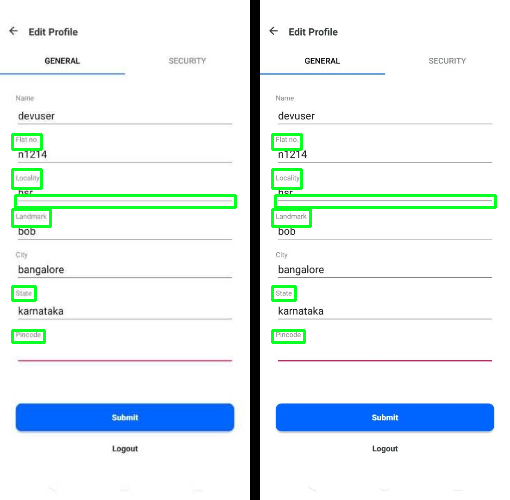


reslist fr above image: [0.8697692902551694, 1, 0.8772858303154646, 1, 0.8560871843855251, 0.8923677493072876, 0.9813640744855787]
score for entire image: 0.9813640744855787
res_list average 0.9252677326784322

RES_LIST :  [0.8697692912551693, 1.000000001, 0.8772858313154646, 1.000000001, 0.8560871853855251, 0.8923677503072875, 0.9813640754855787]
FINAL_SCORE & VERDICT

Score2:  0.9252677336784323
Verdict51:  SAME


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.5810828159458492


Second half SSIM :  0.8482816991554701




res_score5:  0.7184364706283007




Final weighted score5 of below cropped images:  0.1



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.008336080754382082




Final weighted score5 of below cropped images:  0.004168040377191041



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.03999961312701134




Final weighted score5 of below cropped images:  0.01999980656350567



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.00994835246364496




Final weighted score5 of below cropped images:  0.00497417623182248



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.012262221980337515




Final weighted score5 of below cropped images:  0.006131110990168757



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.009365192115775203




Final weighted score5 of below cropped images:  0.004682596057887602



Normal SSIM Score for these images:  0.9513405470238736


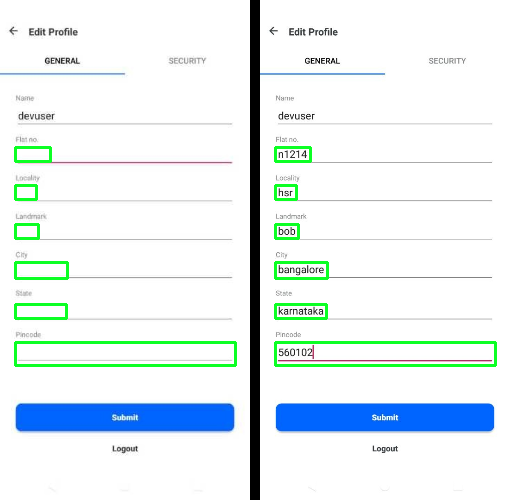


reslist fr above image: [0.1, 0.004168040377191041, 0.01999980656350567, 0.00497417623182248, 0.006131110990168757, 0.004682596057887602, 0.9513405470238736]
score for entire image: 0.9513405470238736
res_list average 0.15589946817777847

RES_LIST :  [0.100000001, 0.004168041377191041, 0.01999980756350567, 0.00497417723182248, 0.006131111990168758, 0.004682597057887602, 0.9513405480238736]
FINAL_SCORE & VERDICT

Score2:  0.15589946917777844
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.8114887672247025


Second half SSIM :  0.8509392785014872




res_score5:  0.8318432369141388




Final weighted score5 of below cropped images:  1



Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.01685704098067263




Final weighted score5 of below cropped images:  0.008428520490336315



Next sub-Image


First if
First half SSIM :  0.573743525611703


Second half SSIM :  0.8585519138752038




res_score5:  0.7201256740734232




Final weighted score5 of below cropped images:  0.1



Normal SSIM Score for these images:  0.9627590269724022


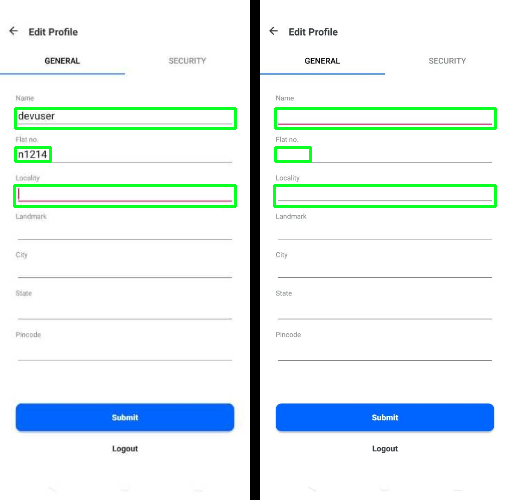


reslist fr above image: [1, 0.008428520490336315, 0.1, 0.9627590269724022]
score for entire image: 0.9627590269724022
res_list average 0.5177968868656846

RES_LIST :  [1.000000001, 0.008428521490336315, 0.100000001, 0.9627590279724022]
FINAL_SCORE & VERDICT

Score2:  0.5177968878656847
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.321704184489646




Final weighted score5 of below cropped images:  0.160852092244823



Normal SSIM Score for these images:  0.9884970382724902


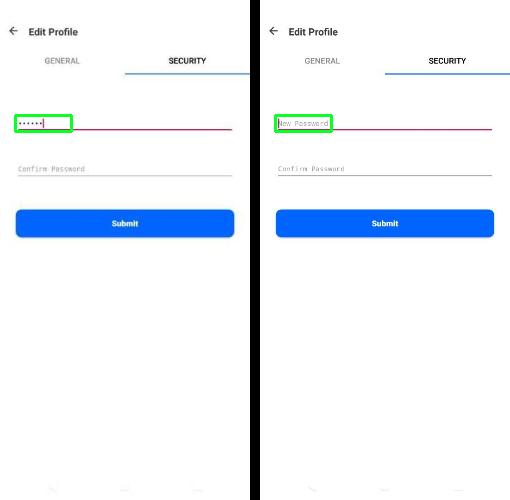


reslist fr above image: [0.160852092244823, 0.9884970382724902]
score for entire image: 0.9884970382724902
res_list average 0.5746745652586567


WARNING! : Small number of places are different


RES_LIST :  [0.160852093244823, 0.9884970392724902]
FINAL_SCORE & VERDICT

Score2:  0.5746745662586566
Verdict41:  DIFFERENT


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9884303992671227


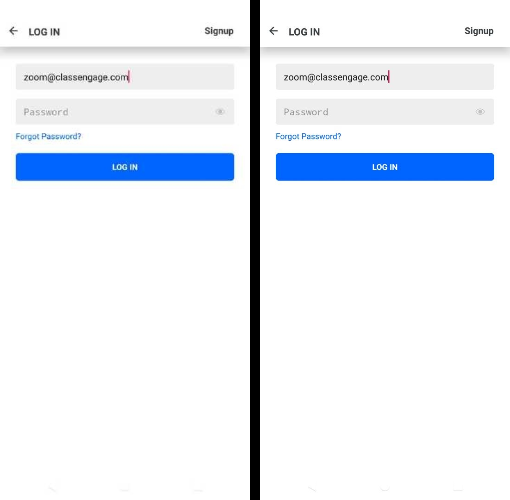


reslist fr above image: [0.9884303992671227]
score for entire image: 0.9884303992671227
res_list average 0.9884303992671227


WARNING! : Small number of places are different


RES_LIST :  [0.9884304002671227]
FINAL_SCORE & VERDICT

Score13:  0.9884304002671227
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.2633307199277315




Final weighted score5 of below cropped images:  0.13166535996386575



Normal SSIM Score for these images:  0.990155440975764


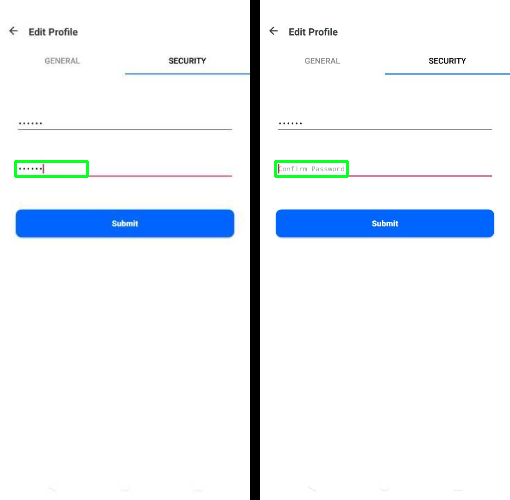


reslist fr above image: [0.13166535996386575, 0.990155440975764]
score for entire image: 0.990155440975764
res_list average 0.5609104004698149


WARNING! : Small number of places are different


RES_LIST :  [0.13166536096386575, 0.990155441975764]
FINAL_SCORE & VERDICT

Score2:  0.5609104014698149
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.15391115606057387


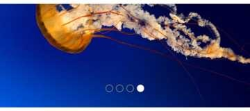

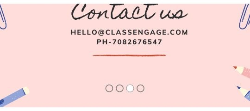



dim: (250, 111)
Resolution crop score res6score: -0.029906072200339362




res6_score just normal SSIM score:  0.15391115606057387


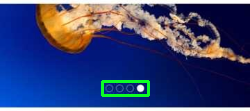

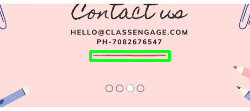


res_score_6_final_for the above_crop -0.029906072200339362

RATIO 0.75
####### weighted score56 of below cropped images:  -0.029906072200339362


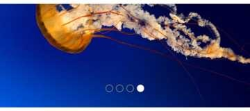

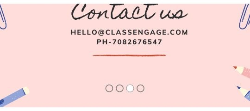


Normal SSIM Score for these images:  0.7891116860062659


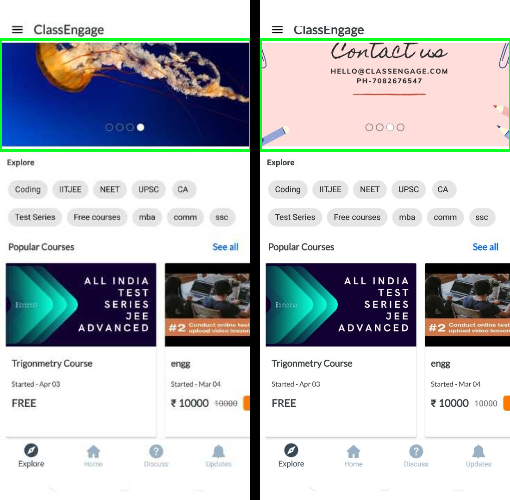


reslist fr above image: [-0.029906072200339362, 0.7891116860062659]
score for entire image: 0.7891116860062659
res_list average 0.3796028069029633


WARNING! : Small number of places are different


RES_LIST :  [-0.029906071200339363, 0.7891116870062659]
FINAL_SCORE & VERDICT

Score8:  0.37960280790296325
Verdict9:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.2806301179276476




Final weighted score5 of below cropped images:  0.1403150589638238



Normal SSIM Score for these images:  0.9886140706198967


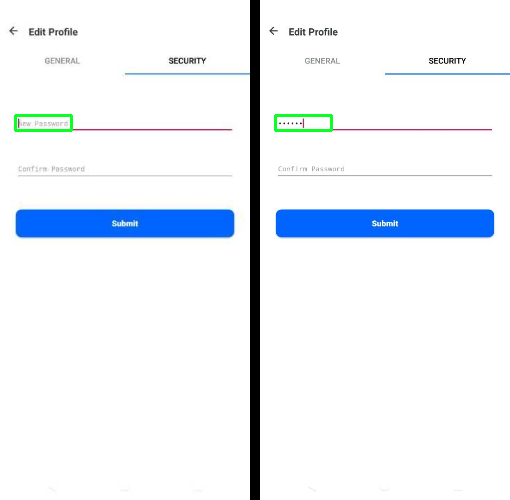


reslist fr above image: [0.1403150589638238, 0.9886140706198967]
score for entire image: 0.9886140706198967
res_list average 0.5644645647918602


WARNING! : Small number of places are different


RES_LIST :  [0.1403150599638238, 0.9886140716198967]
FINAL_SCORE & VERDICT

Score2:  0.5644645657918602
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.4841858087786923


Second half SSIM :  0.8443364613322447




res_score5:  0.6693201529077798




Final weighted score5 of below cropped images:  0.1



Normal SSIM Score for these images:  0.9790691033265311


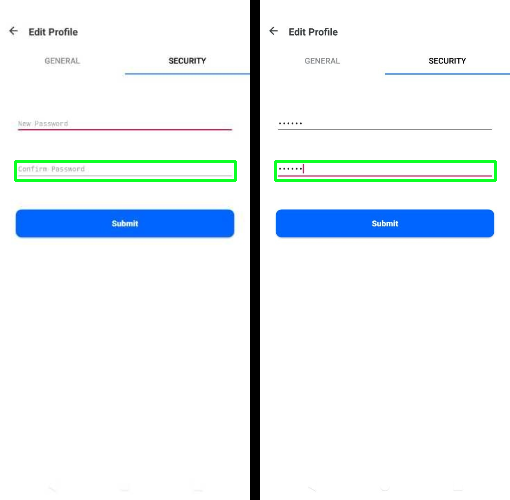


reslist fr above image: [0.1, 0.9790691033265311]
score for entire image: 0.9790691033265311
res_list average 0.5395345516632656


WARNING! : Small number of places are different


RES_LIST :  [0.100000001, 0.979069104326531]
FINAL_SCORE & VERDICT

Score2:  0.5395345526632656
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.18004391593928562




Final weighted score5 of below cropped images:  0.09002195796964281



Normal SSIM Score for these images:  0.9790372107352113


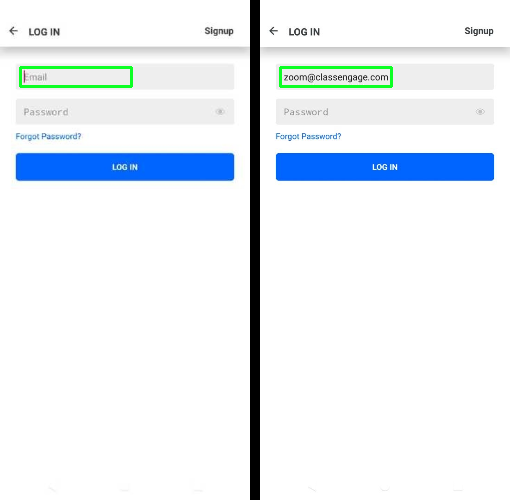


reslist fr above image: [0.09002195796964281, 0.9790372107352113]
score for entire image: 0.9790372107352113
res_list average 0.534529584352427


WARNING! : Small number of places are different


RES_LIST :  [0.09002195896964281, 0.9790372117352113]
FINAL_SCORE & VERDICT

Score2:  0.534529585352427
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
First half SSIM :  0.6689778177738783


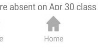

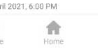

Second half SSIM :  0.4911110655995975


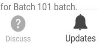

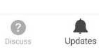



res_score5:  0.58466566178992


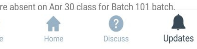

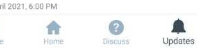



dim: (197, 49)
res6_score just normal SSIM score:  0.58466566178992


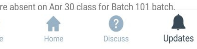

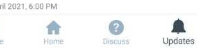


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0.15


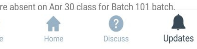

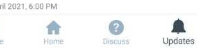


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.42545909006754146


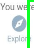

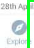



dim: (34, 48)
Resolution crop score res6score: 0.42922920721598673


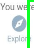

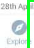



res6_score just normal SSIM score:  0.42545909006754146


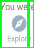

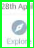


res_score_6_final_for the above_crop 0.42922920721598673

RATIO 1.0
####### weighted score56 of below cropped images:  0.42922920721598673


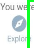

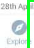


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.11028087911279733




dim: (221, 15)
res6_score just normal SSIM score:  0.11028087911279733



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.01728065289699437




dim: (73, 14)
res6_score just normal SSIM score:  0.01728065289699437



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.4026065049596485


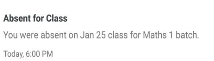

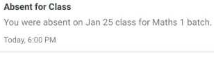



dim: (214, 61)
Resolution crop score res6score: 0.5636167956559729




Resolution crop score res6score: 0.7386989978088995




Resolution crop score res6score: 0.6758618964399833




res6_score just normal SSIM score:  0.4026065049596485


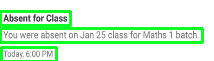

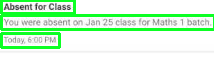


res_score_6_final_for the above_crop 0.6593925633016186

RATIO 1.0
####### weighted score56 of below cropped images:  0.6593925633016186


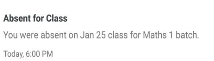

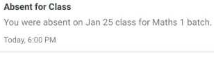


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.39800739663524326


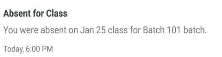

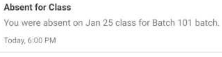



dim: (222, 57)
Resolution crop score res6score: 0.7081929032607851




Resolution crop score res6score: 0.7643560754862325




Resolution crop score res6score: 0.5154938197823015




res6_score just normal SSIM score:  0.39800739663524326


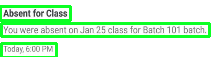

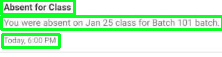


res_score_6_final_for the above_crop 0.6626809328431064

RATIO 1.0
####### weighted score56 of below cropped images:  0.6626809328431064


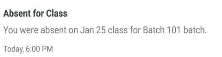

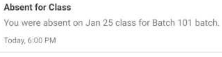


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.08460764268489307




dim: (58, 17)
Resolution crop score res6score: 0.6030367992919599




res6_score just normal SSIM score:  0.08460764268489307



res_score_6_final_for the above_crop 0.6030367992919599

RATIO 1.0
####### weighted score56 of below cropped images:  0.6030367992919599



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.31102113290375955


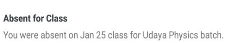

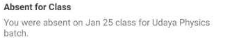



dim: (226, 43)
Resolution crop score res6score: 0.7386331781740015




res6_score just normal SSIM score:  0.31102113290375955


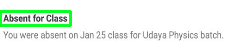

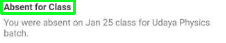


res_score_6_final_for the above_crop 0.7386331781740015

RATIO 0.6666666666666666
####### weighted score56 of below cropped images:  0.7386331781740015


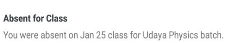

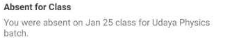


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.4630364926564566


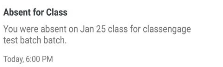

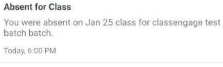



dim: (223, 67)
Resolution crop score res6score: 0.4777789872907709




Resolution crop score res6score: 0.7251033593728701




Resolution crop score res6score: 0.5664186739477399




res6_score just normal SSIM score:  0.4630364926564566


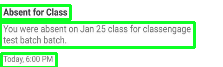

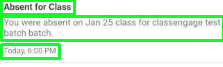


res_score_6_final_for the above_crop 0.5897670068704602

RATIO 1.0
####### weighted score56 of below cropped images:  0.5897670068704602


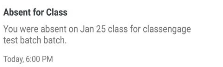

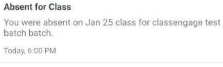


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  -0.05490111808347633




dim: (19, 17)
Resolution crop score res6score: 0.7665243028832317




res6_score just normal SSIM score:  -0.05490111808347633



res_score_6_final_for the above_crop 0.7665243028832317

RATIO 1.0
####### weighted score56 of below cropped images:  0.7665243028832317



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.07832724019517032




dim: (85, 22)
Resolution crop score res6score: 0.7671549900070219




res6_score just normal SSIM score:  0.07832724019517032



res_score_6_final_for the above_crop 0.7671549900070219

RATIO 1.0
####### weighted score56 of below cropped images:  0.7671549900070219



Normal SSIM Score for these images:  0.6470289484787586


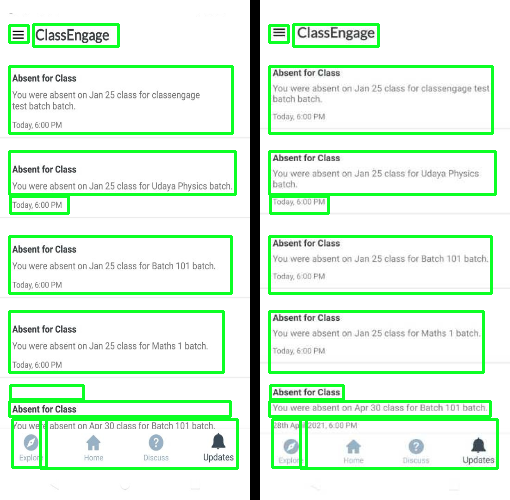


reslist fr above image: [0.15, 0.42922920721598673, 0, 0, 0.6593925633016186, 0.6626809328431064, 0.6030367992919599, 0.7386331781740015, 0.5897670068704602, 0.7665243028832317, 0.7671549900070219, 0.6470289484787586]
score for entire image: 0.6470289484787586
res_list average 0.5011206607555121

RES_LIST :  [0.150000001, 0.42922920821598676, 1e-09, 1e-09, 0.6593925643016185, 0.6626809338431063, 0.6030368002919598, 0.7386331791740015, 0.5897670078704602, 0.7665243038832317, 0.7671549910070219, 0.6470289494787586]
FINAL_SCORE & VERDICT

Score8:  0.5011206617555121
Verdict9:  DIFFERENT


###########################################################################
Next Image
Next sub-Image


First if
res_score5 lower_than_lower_bound:  0.21753535908948135




Final weighted score5 of below cropped images:  0.10876767954474068



Normal SSIM Score for these images:  0.9840932042113197


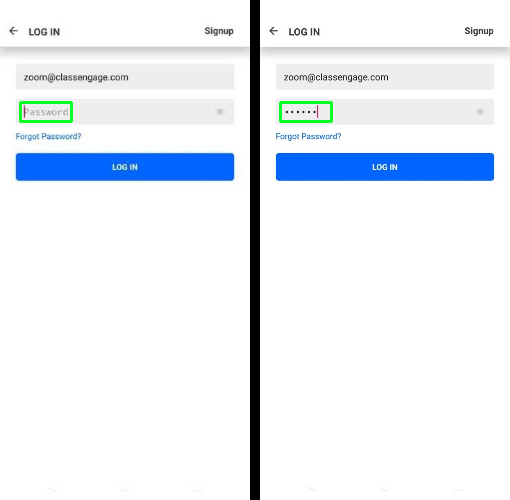


reslist fr above image: [0.10876767954474068, 0.9840932042113197]
score for entire image: 0.9840932042113197
res_list average 0.5464304418780302


WARNING! : Small number of places are different


RES_LIST :  [0.10876768054474067, 0.9840932052113197]
FINAL_SCORE & VERDICT

Score2:  0.5464304428780302
Verdict41:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.19248721556872594




dim: (32, 23)
Resolution crop score res6score: 0.47748192412825086




res6_score just normal SSIM score:  0.19248721556872594



res_score_6_final_for the above_crop 0.47748192412825086

RATIO 1.0
####### weighted score56 of below cropped images:  0.47748192412825086



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.49741382201872053


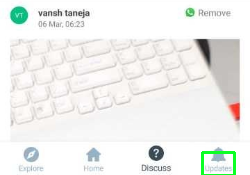

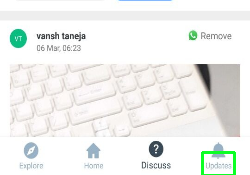



dim: (250, 175)
Resolution crop score res6score: 0.8576688288302773




Resolution crop score res6score: 0.20197444436349263




Resolution crop score res6score: 0.1814938584497705


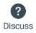

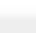



Resolution crop score res6score: 0.07855572374829271




Resolution crop score res6score: 0.8563996807897123




res6_score just normal SSIM score:  0.49741382201872053


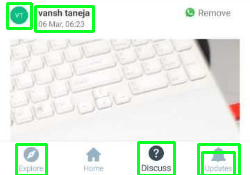

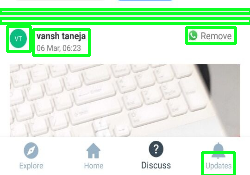


res_score_6_final_for the above_crop 0.4352185072363091

RATIO 0.7777777777777778
####### weighted score56 of below cropped images:  0.4352185072363091


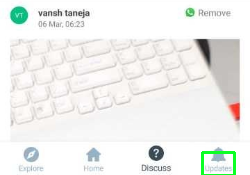

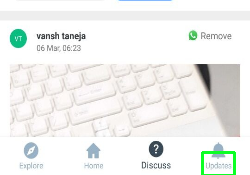


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.40493709544572226


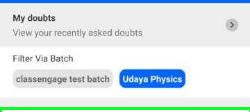

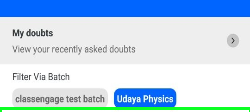



dim: (250, 112)
Resolution crop score res6score: 0.13237230299667713




Resolution crop score res6score: 0.7120736793782938




Resolution crop score res6score: 0.9527164633889321




res6_score just normal SSIM score:  0.40493709544572226


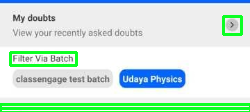

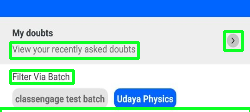


res_score_6_final_for the above_crop 0.5990541485879677

RATIO 0.7142857142857143
####### weighted score56 of below cropped images:  0.5990541485879677


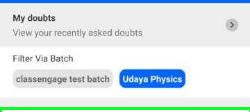

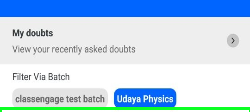


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  -0.05497382319500847




dim: (19, 17)
Resolution crop score res6score: 0.7665473656975333




res6_score just normal SSIM score:  -0.05497382319500847



res_score_6_final_for the above_crop 0.7665473656975333

RATIO 1.0
####### weighted score56 of below cropped images:  0.7665473656975333



Next sub-Image

Else part
First half SSIM :  0.677500190972652


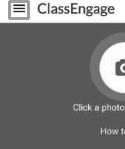

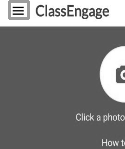

Second half SSIM :  0.765021827331522


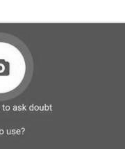

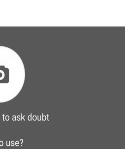



res_score5:  0.7102477258476535


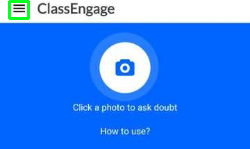

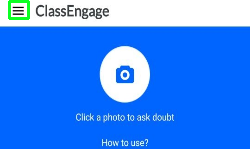



dim: (250, 149)
Resolution crop score res6score: 0.7072431713471466




Resolution crop score res6score: 0.597320789863655




res6_score just normal SSIM score:  0.7102477258476535


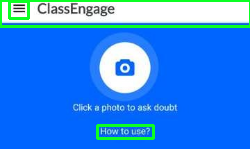

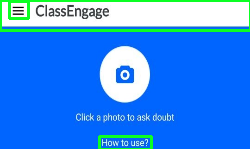


res_score_6_final_for the above_crop 0.6522819806054008

RATIO 0.75
####### weighted score56 of below cropped images:  0.7392114854540506


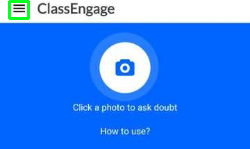

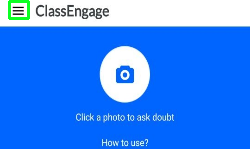


Normal SSIM Score for these images:  0.5995862917646678


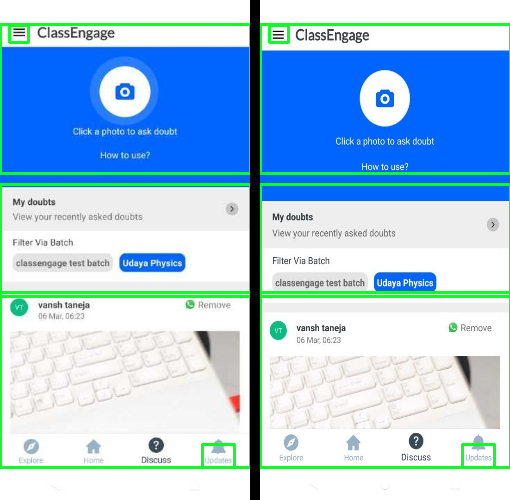


reslist fr above image: [0.47748192412825086, 0.4352185072363091, 0.5990541485879677, 0.7665473656975333, 0.7392114854540506, 0.5995862917646678]
score for entire image: 0.5995862917646678
res_list average 0.6028499538114632

RES_LIST :  [0.4774819251282509, 0.43521850823630914, 0.5990541495879677, 0.7665473666975333, 0.7392114864540505, 0.5995862927646678]
FINAL_SCORE & VERDICT

Score8:  0.6028499548114632
Verdict10:  SAME


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.30270405754335816




dim: (30, 25)
res6_score just normal SSIM score:  0.30270405754335816



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.3076473891883834


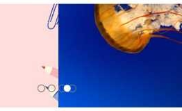

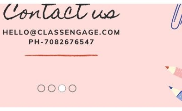



dim: (182, 111)
res6_score just normal SSIM score:  0.3076473891883834


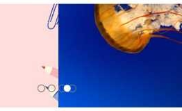

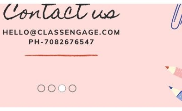


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


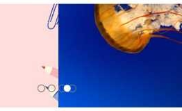

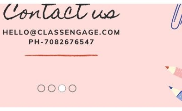


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.22617207703133257


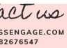

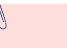



dim: (67, 48)
res6_score just normal SSIM score:  0.22617207703133257


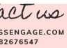

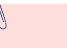


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


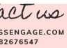

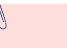


Normal SSIM Score for these images:  0.8418497676692719


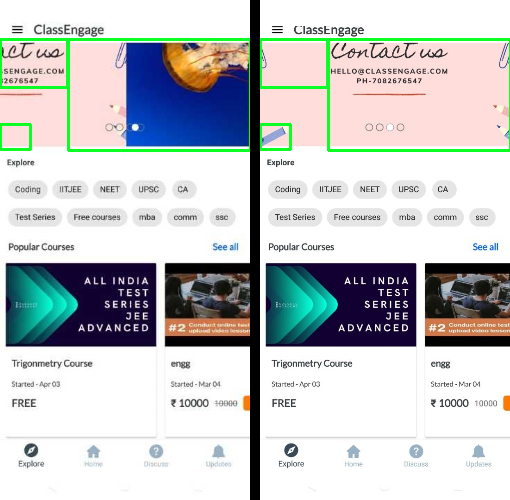


reslist fr above image: [0, 0, 0, 0.8418497676692719]
score for entire image: 0.8418497676692719
res_list average 0.21046244191731797

RES_LIST :  [1e-09, 1e-09, 1e-09, 0.8418497686692719]
FINAL_SCORE & VERDICT

Score8:  0.21046244291731797
Verdict9:  DIFFERENT


###########################################################################
Next Image
Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.19247953488524688




dim: (32, 23)
Resolution crop score res6score: 0.4774550128577517




res6_score just normal SSIM score:  0.19247953488524688



res_score_6_final_for the above_crop 0.4774550128577517

RATIO 1.0
####### weighted score56 of below cropped images:  0.4774550128577517



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.291828904727836


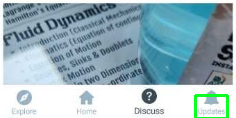

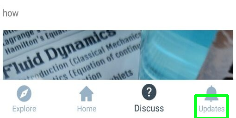



dim: (236, 118)
res6_score just normal SSIM score:  0.291828904727836


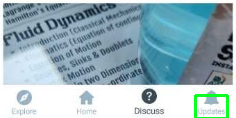

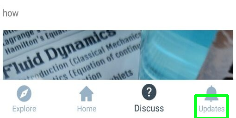


Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0


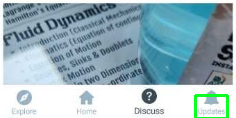

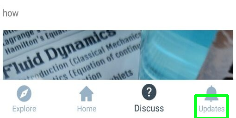


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.08821447198512992




dim: (49, 16)
res6_score just normal SSIM score:  0.08821447198512992



Here really??
res_score_6_final_for the above_crop 0

RATIO 0
####### weighted score56 of below cropped images:  0



Next sub-Image

Else part
First half SSIM :  0.4901047737623653


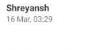

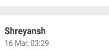

Second half SSIM :  0.7426373657547701


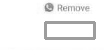

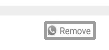



res_score5:  0.6238461636520698


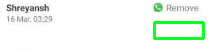

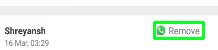



dim: (218, 50)
Resolution crop score res6score: 0.5952365319723626




Resolution crop score res6score: 0.704738275990517




Resolution crop score res6score: 0.11445511917116735




res6_score just normal SSIM score:  0.6238461636520698


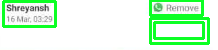

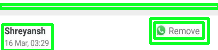


res_score_6_final_for the above_crop 0.4714766423780156

RATIO 0
####### weighted score56 of below cropped images:  0.15


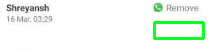

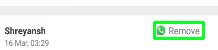


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.46826834596224304


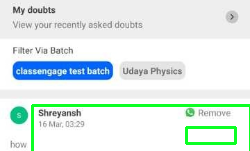

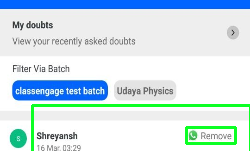



dim: (250, 151)
Resolution crop score res6score: 0.29660657524197115




Resolution crop score res6score: 0.19488661658598602




Resolution crop score res6score: 0.7128160701917539




Resolution crop score res6score: 0.9527164633889321




res6_score just normal SSIM score:  0.46826834596224304


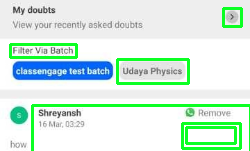

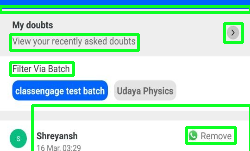


res_score_6_final_for the above_crop 0.5392564313521608

RATIO 0.625
####### weighted score56 of below cropped images:  0.5392564313521608


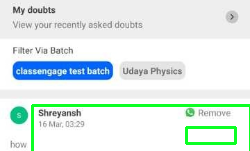

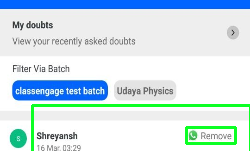


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.46754793290158353


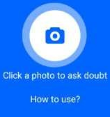

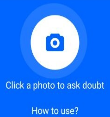



dim: (110, 117)
Resolution crop score res6score: 0.6146867415404643


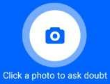

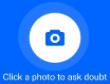



Resolution crop score res6score: 0.5895921157486642




res6_score just normal SSIM score:  0.46754793290158353


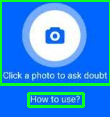

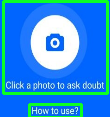


res_score_6_final_for the above_crop 0.6021394286445643

RATIO 1.0
####### weighted score56 of below cropped images:  0.6021394286445643


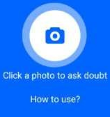

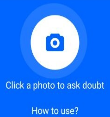


Next sub-Image

Else part
res_score5 lower_than_lower_bound:  -0.05497382319500847




dim: (19, 17)
Resolution crop score res6score: 0.7665473656975333




res6_score just normal SSIM score:  -0.05497382319500847



res_score_6_final_for the above_crop 0.7665473656975333

RATIO 1.0
####### weighted score56 of below cropped images:  0.7665473656975333



Next sub-Image

Else part
res_score5 lower_than_lower_bound:  0.46462573389610085




dim: (250, 30)
Resolution crop score res6score: 0.6650422524474797




res6_score just normal SSIM score:  0.46462573389610085



res_score_6_final_for the above_crop 0.6650422524474797

RATIO 1.0
####### weighted score56 of below cropped images:  0.6650422524474797



Normal SSIM Score for these images:  0.567563560499654


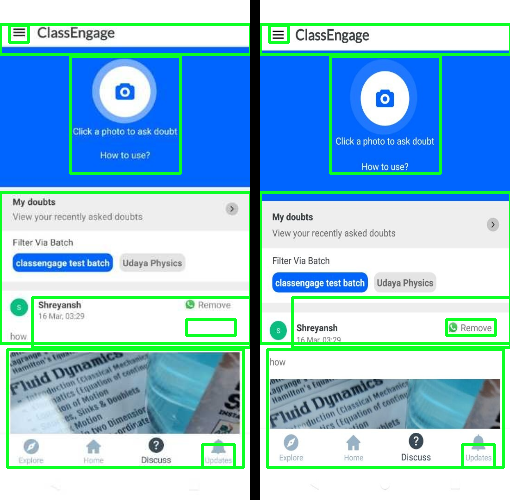


reslist fr above image: [0.4774550128577517, 0, 0, 0.15, 0.5392564313521608, 0.6021394286445643, 0.7665473656975333, 0.6650422524474797, 0.567563560499654]
score for entire image: 0.567563560499654
res_list average 0.41866711683323826

RES_LIST :  [0.47745501385775174, 1e-09, 1e-09, 0.150000001, 0.5392564323521608, 0.6021394296445642, 0.7665473666975333, 0.6650422534474797, 0.5675635614996539]
FINAL_SCORE & VERDICT

Score8:  0.4186671178332382
Verdict9:  DIFFERENT


###########################################################################
Next Image
Normal SSIM Score for these images:  0.9805841998083357


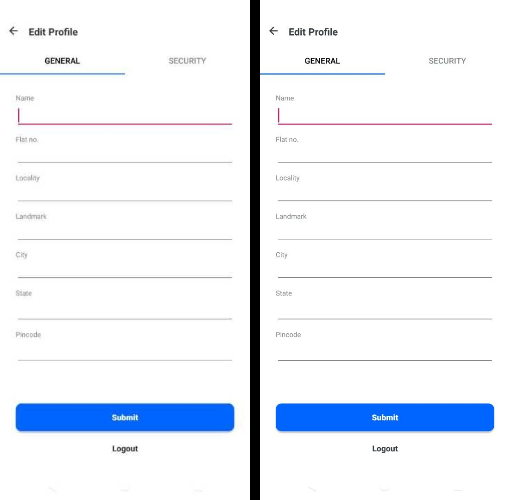


reslist fr above image: [0.9805841998083357]
score for entire image: 0.9805841998083357
res_list average 0.9805841998083357


WARNING! : Small number of places are different


RES_LIST :  [0.9805842008083356]
FINAL_SCORE & VERDICT

Score13:  0.9805842008083356
Verdict14:  SAME


###########################################################################
Next Image
Next sub-Image


First if
res_score5:  0.859961885496948




Final weighted score5 of below cropped images:  0.859961885496948



Normal SSIM Score for these images:  0.9697122002571166


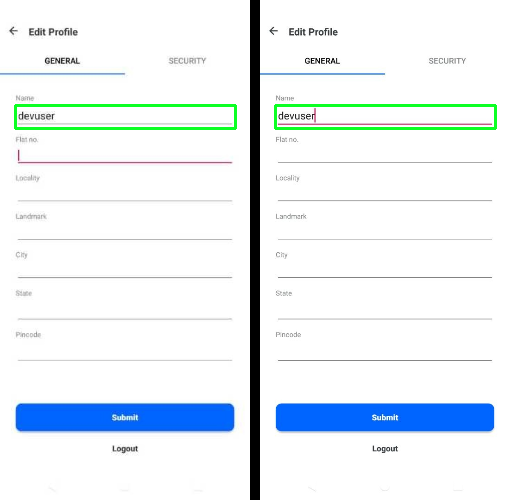


reslist fr above image: [0.859961885496948, 0.9697122002571166]
score for entire image: 0.9697122002571166
res_list average 0.9148370428770323


WARNING! : Small number of places are different


RES_LIST :  [0.8599618864969479, 0.9697122012571165]
FINAL_SCORE & VERDICT

Score2:  0.9148370438770322
Verdict51:  SAME


###########################################################################
Next Image
Next sub-Image


First if
First half SSIM :  0.6660978087594499


Second half SSIM :  0.8863036435688177




res_score5:  0.7793084056758101




Final weighted score5 of below cropped images:  0.1



Next sub-Image


First if
First half SSIM :  0.8088642457612041


Second half SSIM :  0.8478065561076776




res_score5:  0.8288884403474395




Final weighted score5 of below cropped images:  1



Normal SSIM Score for these images:  0.964439257532553


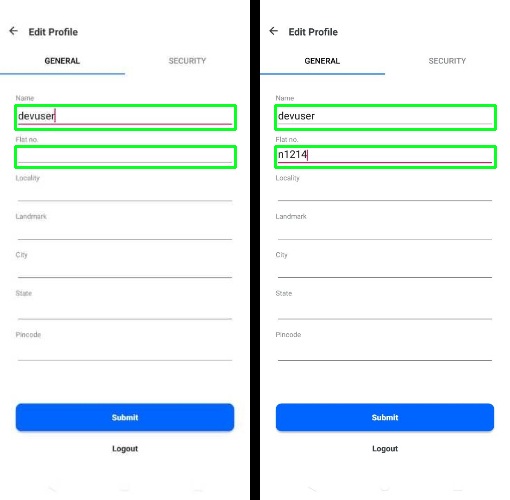


reslist fr above image: [0.1, 1, 0.964439257532553]
score for entire image: 0.964439257532553
res_list average 0.6881464191775177


WARNING! : Small number of places are different


RES_LIST :  [0.100000001, 1.000000001, 0.964439258532553]
FINAL_SCORE & VERDICT

Score2:  0.6881464201775177
Verdict41:  DIFFERENT


s_d_list:  [0.6288906663070858, 0.9372599665620951, 0.5404448887302334, 0.5324989389291421, 0.40375501055459867, 0.20292048393573434, 0.9820780313904531, 0.9731650642814268, 0.9793656607213367, 0.9785698691405885, 0.5576778374353966, 0.9541210387861857, 0.9203803048603209, 0.9203803048603209, 0.9898364805330123, 0.4011785387071289, 0.48757430652776007, 0.9800486373833791, 0.9798480773077336, 0.5307677335478612, 0.9781565322543491, 0.9252677326784322, 0.15589946817777847, 0.5177968868656846, 0.5746745652586567, 0.9884303992671227, 0.5609104004698149, 0.3796028069029633, 0.5644645647918602, 0.5395345516632656, 0.534529584352427, 0.5011206607555121, 0.5464304418780302, 0.6028499

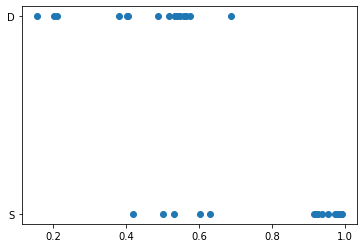

In [ ]:
#@title Sending the images { vertical-output: true, form-width: "60%" }
%%time
path1 = "/content/Run2/"
length = len(os.listdir(path1))
s_d_list = []
for i in range(length):
  path2 = "/content/Run2/"+str(i)+".jpeg"
  path1 = "/content/Test2/"+str(i)+".jpeg"
  obj = Score_out(path1,path2)
  s_d_list.append (obj.call(df_SSIM)[0])

print("s_d_list: ",s_d_list)
string =   "SSDDDSSSSSSSSSSSSSSSSSDDDSDSDDDSDSSSSSD"#actual
expected = "SSDDDDSSSSDSSSSDDSSSSSDDDSDDDDDSDSDSSSD"
obj.plotter(s_d_list,expected)